## The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 2
-----
##  Project 2: Music Genre Prediction from Audio, Metadata and Text Features
-----
###### Student Name(s): Haichao Song
###### Python version: 3.7.2
###### Submission deadline: 5 PM 16 Oct 2020

# Import settings

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import chi2, SelectKBest
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from pprint import pprint
import string
import re
import nltk
from nltk.tokenize import word_tokenize

In [3]:
RANDOM_STATE = 854035

In [4]:
def select_df1_columns_based_on_df2(df1, df2):
    return df1[list(df2.columns)]

# Read datasets

In [5]:
def read_csv(file_path: str):
    return pd.read_csv(file_path)

In [6]:
test_features = read_csv('dataset/test_features.csv')
train_features = read_csv('dataset/train_features.csv')
train_labels = read_csv('dataset/train_labels.csv')
valid_features = read_csv('dataset/valid_features.csv')
valid_labels = read_csv('dataset/valid_labels.csv')

In [7]:
test_features = test_features.set_index('trackID')
train_features = train_features.set_index('trackID')
train_labels = train_labels.set_index('trackID')
valid_features = valid_features.set_index('trackID')
valid_labels = valid_labels.set_index('trackID')

In [8]:
train_features

title  \
trackID                                    
8424             The Calamity [Explicit]   
7923                      Try To Find Me   
2314                Poor Old Dirt Farmer   
810                          Texas Flood   
439                    Chopsticks Medley   
...                                  ...   
6419                     Stop That Train   
6811                In A Close Encounter   
1474     Our Lady Of Sorrow (LP Version)   
8343                           Section X   
8454               Regular Dose Of Azure   

                                                      tags  loudness    tempo  \
trackID                                                                         
8424     the, you, to, a, not, in, of, that, are, we, w...    -2.824  131.969   
7923     i, the, you, to, and, a, me, it, not, in, my, ...   -11.249  136.510   
2314     the, to, and, a, in, is, on, all, no, have, bu...    -6.932   72.878   
810      i, the, you, to, and, a, me, it, not, in, my, ...   -12.551   75.381   
439      i, to, and, me, love, but, with, oh, they, she...   -14.566  134.331   
...                                                    ...       ...      ...   
6419     i, the, to, and, a, it, not, my, that, do, am,...   -10.798  146.624   
6811     i, the, to, a, in, my, of, so, with, they, see...    -3.759  153.760   
1474     i, the, you, to, and, a, not, in, is, of, that...   -11.883   98.596   
8343     i, the, you, to, and, a, me, in, my, is, of, y...    -3.518  101.639   
8454     i, the, to, and, a, me, not, in, my, is, of, t...    -7.217  119.586   

         time_signature  key  mode   duration     vect_1     vect_2  ...  \
trackID                                                              ...   
8424                  4    0     1  298.13506  52.050795  55.591771  ...   
7923                  4    4     1  248.03220  38.488583 -38.186087  ...   
2314                  4    7     1  231.00036  45.424130  36.587988  ...   
810                   3    6     1  390.29506  42.546616  47.126411  ...   
439                   4    5     0  286.11873  36.161980  -6.806859  ...   
...                 ...  ...   ...        ...        ...        ...  ...   
6419                  1    7     1  236.48608  40.258501 -52.111872  ...   
6811                  4    6     1  171.78077  51.767393  68.259900  ...   
1474                  4   10     1  255.58159  40.285352  12.846995  ...   
8343                  4    4     0  547.94404  52.670728  55.895759  ...   
8454                  4    8     1  226.01098  47.299664  47.017187  ...   

         vect_139  vect_140  vect_141  vect_142  vect_143  vect_144  vect_145  \
trackID                                                                         
8424     0.001097  0.001161  0.001225  0.001251  0.001238  0.001202  0.001130   
7923     0.000117  0.000134  0.000147  0.000161  0.000157  0.000126  0.000121   
2314     0.000962  0.001203  0.001214  0.001152  0.001025  0.000933  0.000838   
810      0.000167  0.000183  0.000198  0.000205  0.000203  0.000197  0.000183   
439      0.000084  0.000089  0.000094  0.000100  0.000098  0.000089  0.000083   
...           ...       ...       ...       ...       ...       ...       ...   
6419     0.001282  0.001359  0.001422  0.001447  0.001430  0.001438  0.001437   
6811     0.000588  0.000628  0.000633  0.000659  0.000643  0.000619  0.000562   
1474     0.000163  0.000159  0.000164  0.000173  0.000172  0.000164  0.000154   
8343     0.000924  0.000991  0.000968  0.000987  0.000976  0.000925  0.000884   
8454     0.000742  0.000878  0.000984  0.001038  0.001031  0.000959  0.000818   

         vect_146  vect_147  vect_148  
trackID                                
8424     0.001040  0.104525  0.335818  
7923     0.000134  0.124080  1.553742  
2314     0.000867  0.311885  7.835358  
810      0.000164  0.115680  0.395675  
439      0.000078  0.186119  1.472794  
...           ...       ...       ...  
6419     0.001474  0.184104  2.765411  
6811 

# Evaluate functions

## train

In [9]:
def train(models, X, Y):
    trained = []
    for model in models:
        model.fit(X, Y.values.ravel())
        trained.append(model)
    return trained

## predict

In [10]:
def predict(models, X):
    preds = []
    for model in models:
        pred = model.predict(X)
        preds.append(pd.DataFrame(pred, columns=["genre"], index=X.index))
    return preds

## evaluate

In [11]:
# This function should evaluate a set of predictions in terms of metrics
def evaluate(pred, true, average='macro'):
    CM = metrics.confusion_matrix(true, pred) # Confusion Matrix
    Acc = metrics.accuracy_score(true, pred) # Accuracy
    PRF = metrics.precision_recall_fscore_support(true, pred, average=average) # Precision, Recall and F1-score
    return CM, Acc, PRF

# Preprocesses & Exploration

## Divide data to 3 child dataframe

In [12]:
train_text = train_features[['title', 'tags']]
train_metadata = train_features[['loudness','tempo','key','mode','duration']]
train_audio = train_features.filter(regex='vect_')

In [104]:
valid_text = valid_features[['title', 'tags']]
valid_metadata = valid_features[['loudness','tempo','key','mode','duration']]
valid_audio = valid_features.filter(regex='vect_')

In [13]:
train_text

title  \
trackID                                    
8424             The Calamity [Explicit]   
7923                      Try To Find Me   
2314                Poor Old Dirt Farmer   
810                          Texas Flood   
439                    Chopsticks Medley   
...                                  ...   
6419                     Stop That Train   
6811                In A Close Encounter   
1474     Our Lady Of Sorrow (LP Version)   
8343                           Section X   
8454               Regular Dose Of Azure   

                                                      tags  
trackID                                                     
8424     the, you, to, a, not, in, of, that, are, we, w...  
7923     i, the, you, to, and, a, me, it, not, in, my, ...  
2314     the, to, and, a, in, is, on, all, no, have, bu...  
810      i, the, you, to, and, a, me, it, not, in, my, ...  
439      i, to, and, me, love, but, with, oh, they, she...  
...                                                    ...  
6419     i, the, to, and, a, it, not, my, that, do, am,...  
6811     i, the, to, a, in, my, of, so, with, they, see...  
1474     i, the, you, to, and, a, not, in, is, of, that...  
8343     i, the, you, to, and, a, me, in, my, is, of, y...  
8454     i, the, to, and, a, me, not, in, my, is, of, t...  

[7678 rows x 2 columns]

## One hot encoding

In [14]:
def one_hot_encoding(data: pd.DataFrame, column_name):
    new_df = data.copy()
    new_df = pd.get_dummies(new_df, prefix=column_name, columns=[column_name])
    
    return new_df

## Check missing data

In [15]:
missing = train_features.isnull().sum()
missing.sum()

0

In [16]:
missing = valid_features.isnull().sum()
missing.sum()

0

In [17]:
missing = test_features.isnull().sum()
missing.sum()

0

## View data distribution

In [18]:
train_features_num = train_features._get_numeric_data()
valid_features_num = valid_features._get_numeric_data()
test_features_num = test_features._get_numeric_data()

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


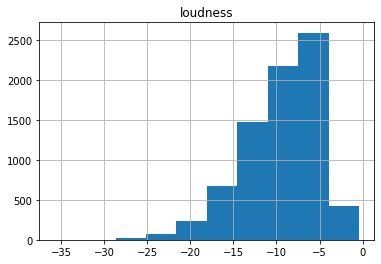

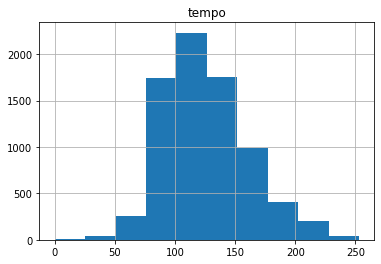

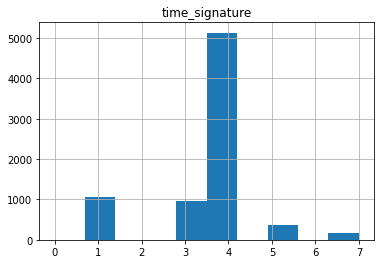

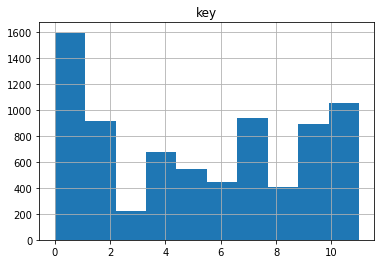

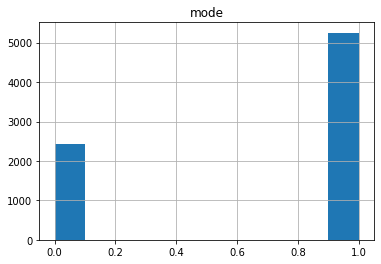

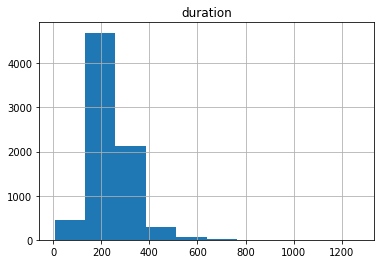

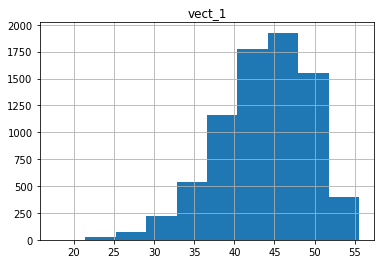

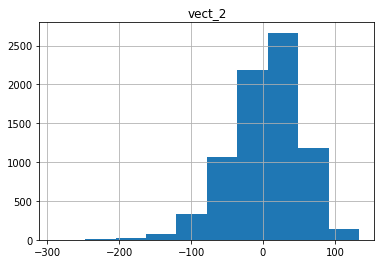

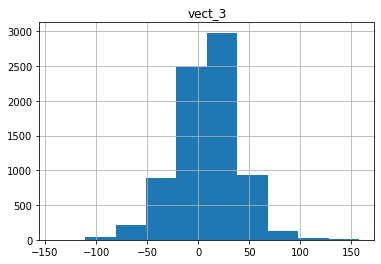

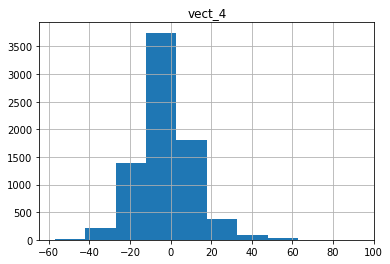

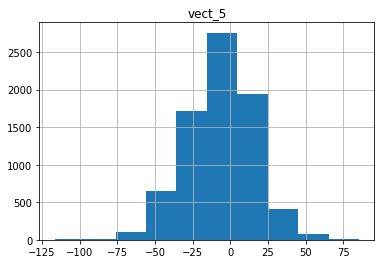

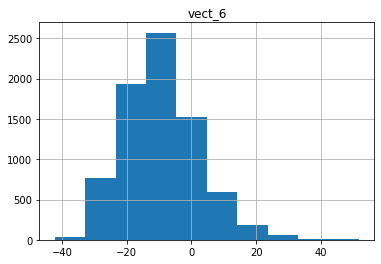

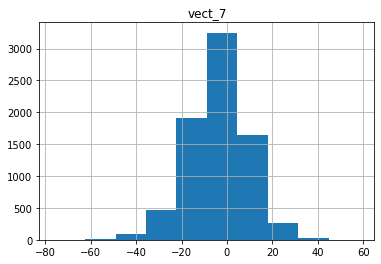

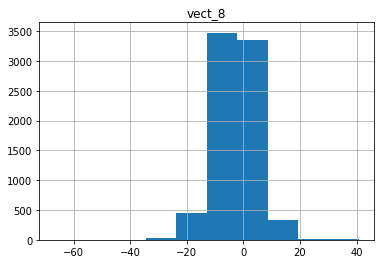

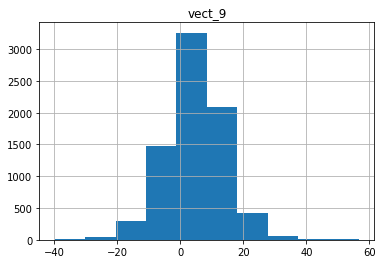

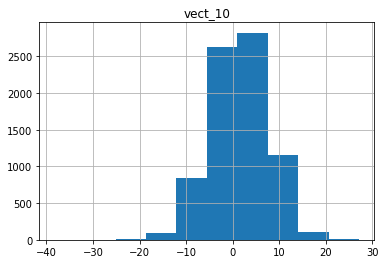

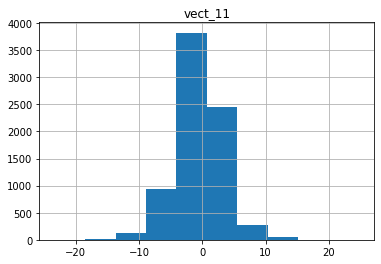

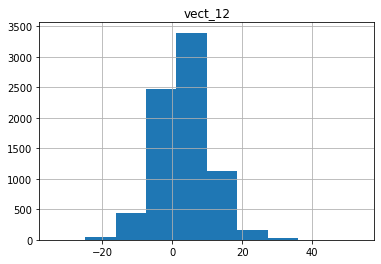

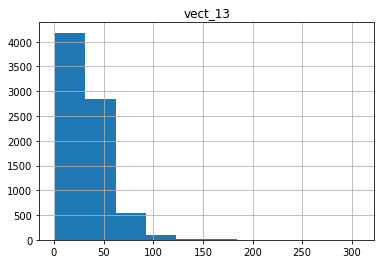

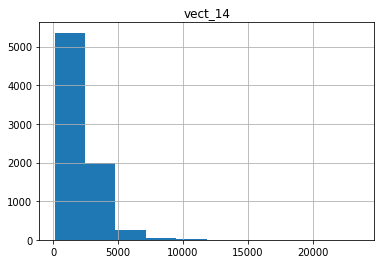

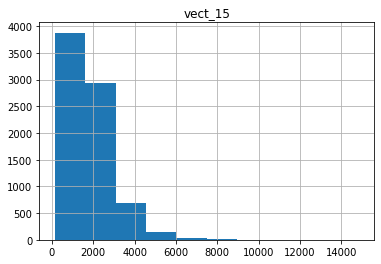

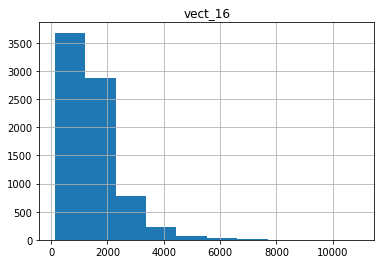

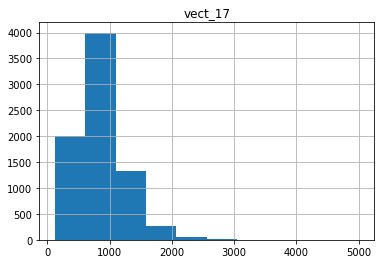

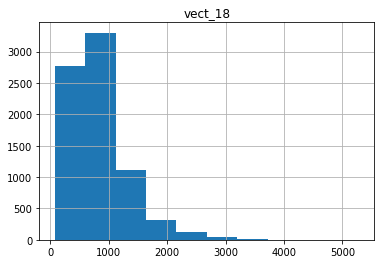

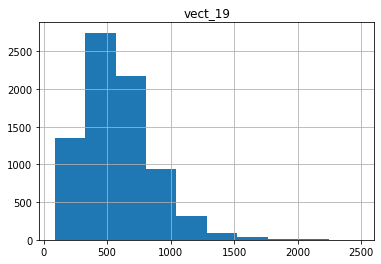

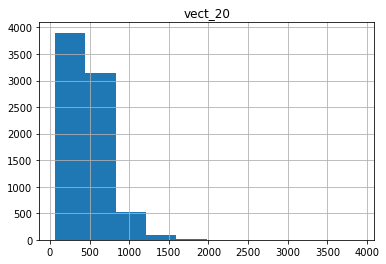

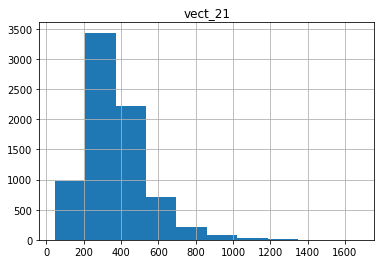

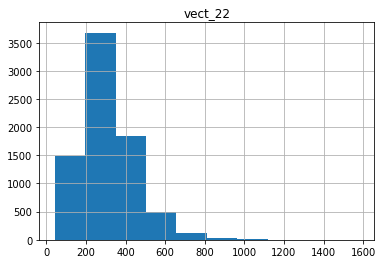

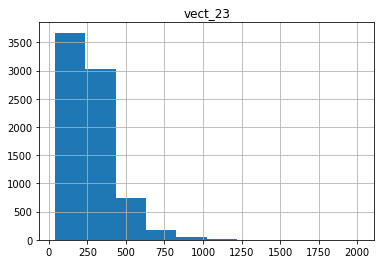

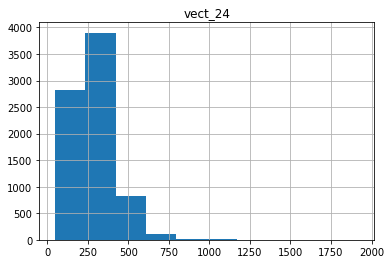

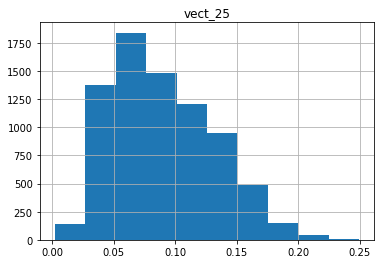

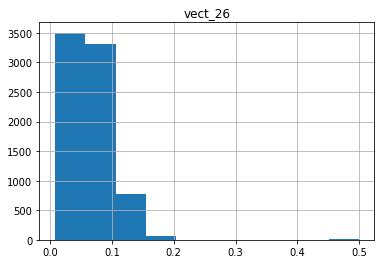

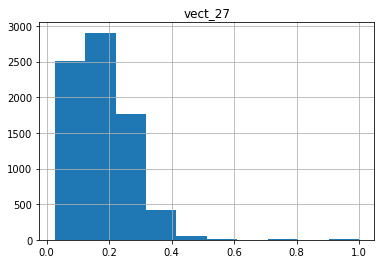

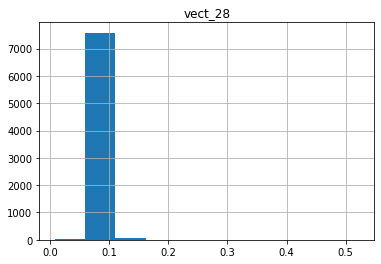

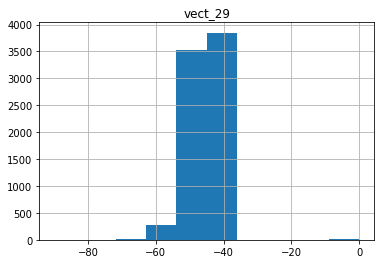

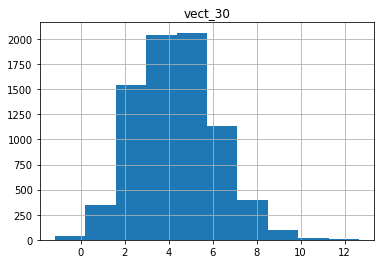

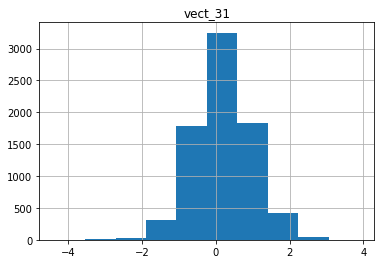

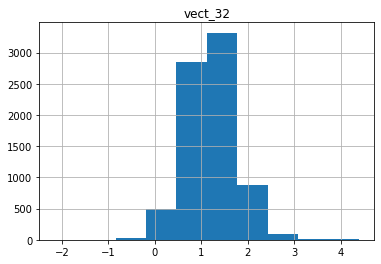

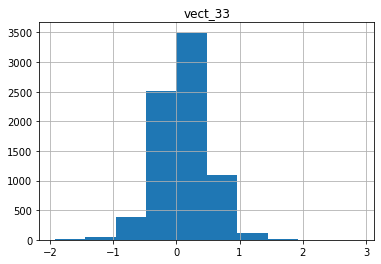

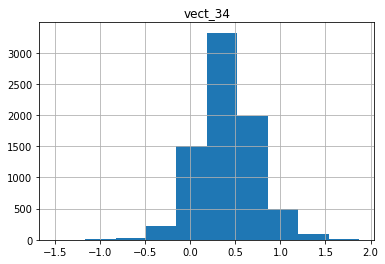

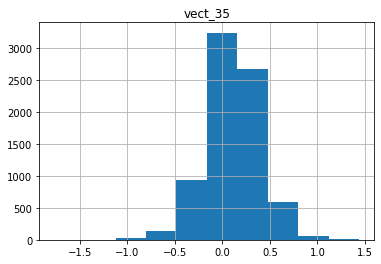

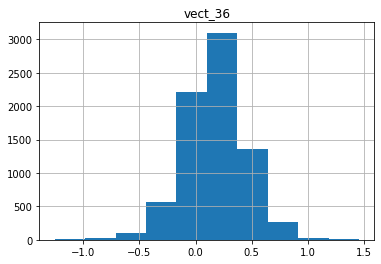

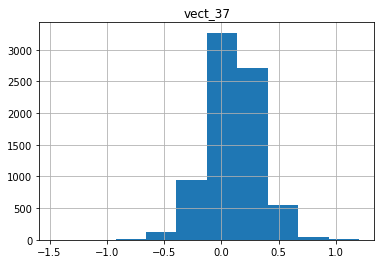

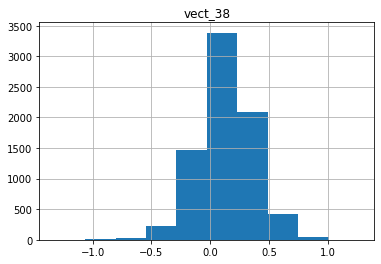

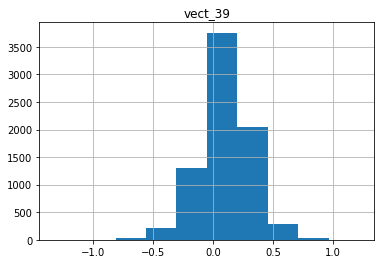

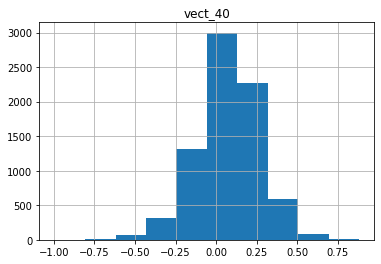

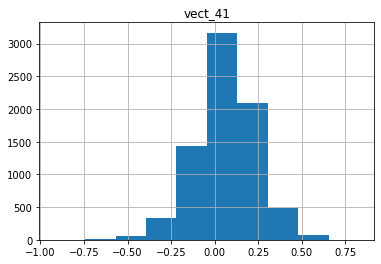

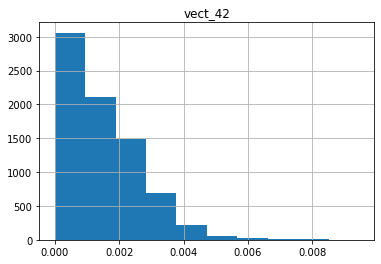

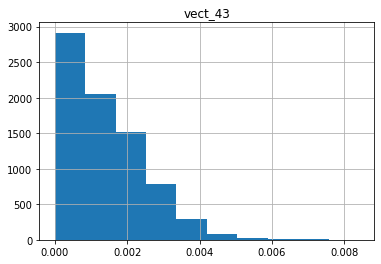

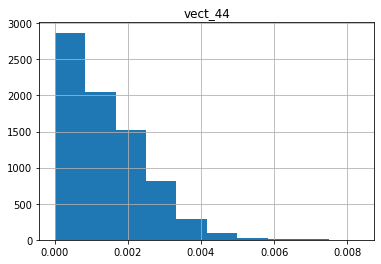

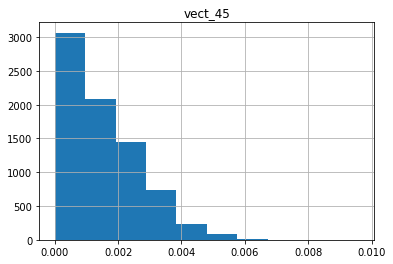

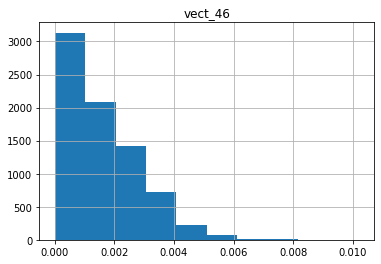

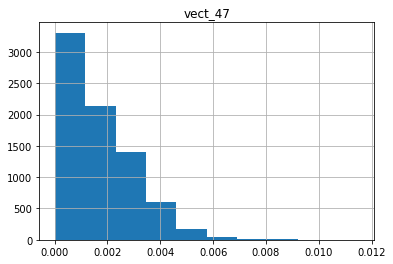

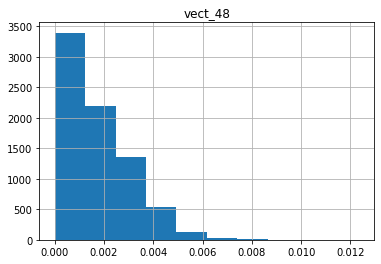

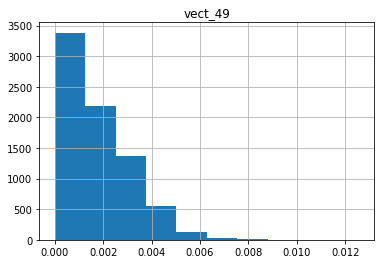

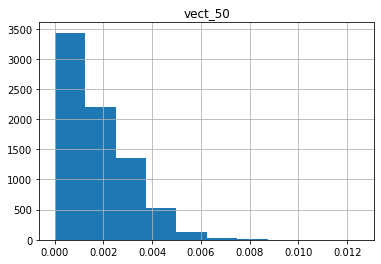

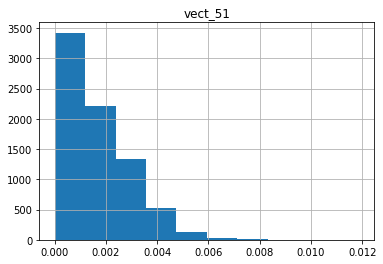

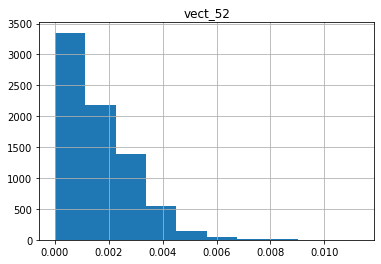

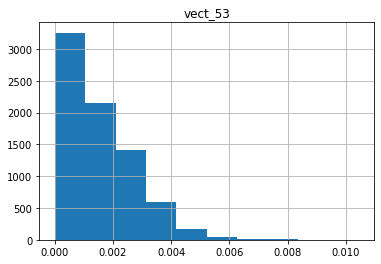

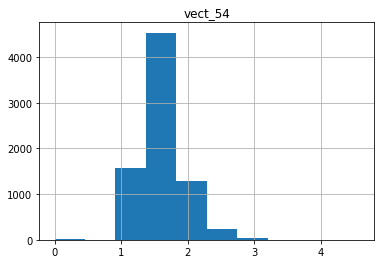

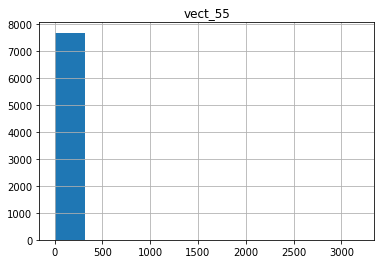

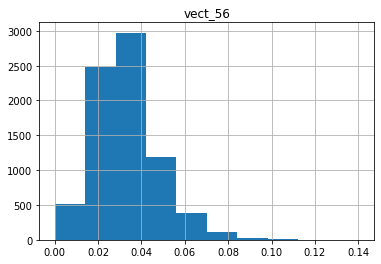

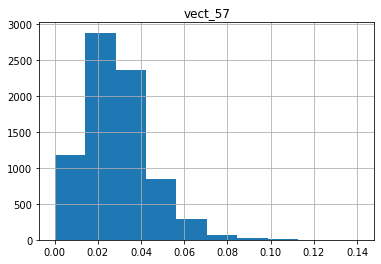

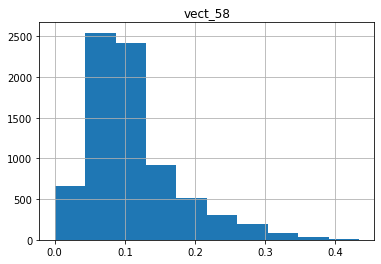

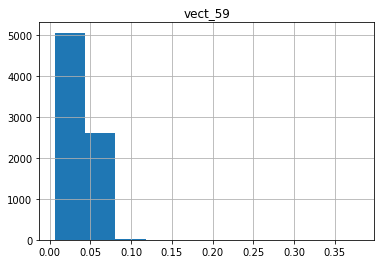

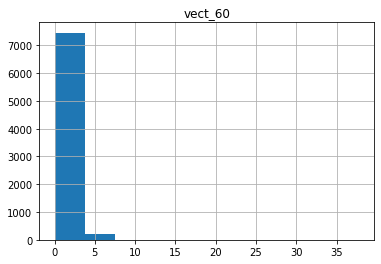

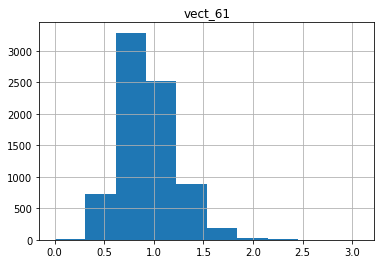

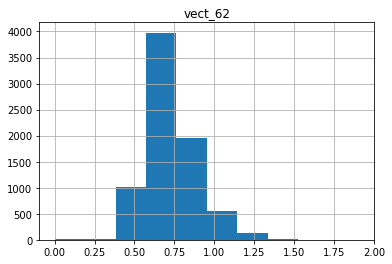

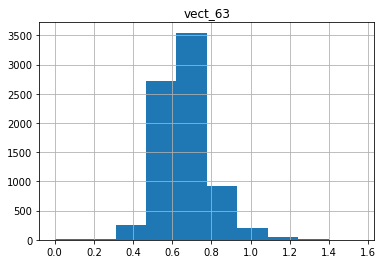

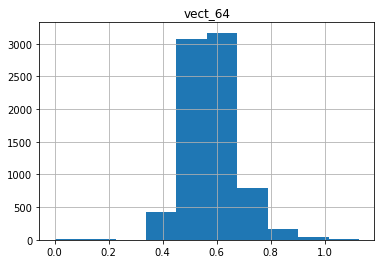

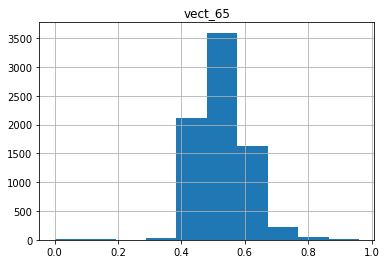

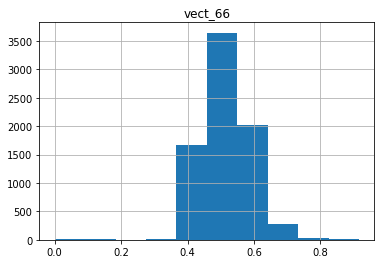

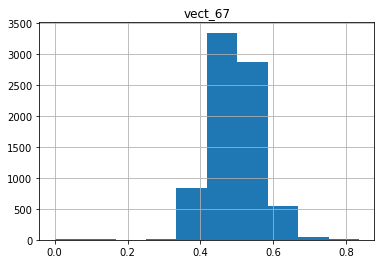

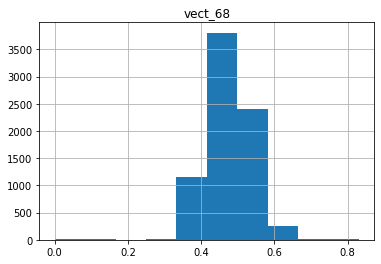

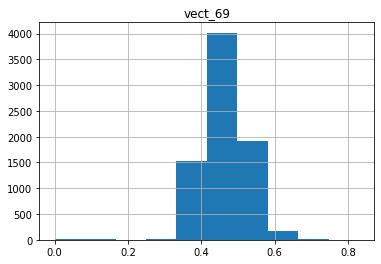

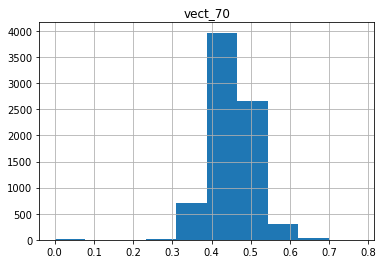

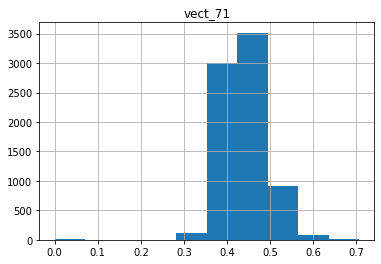

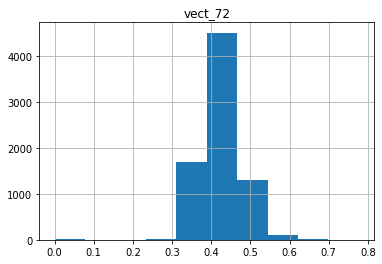

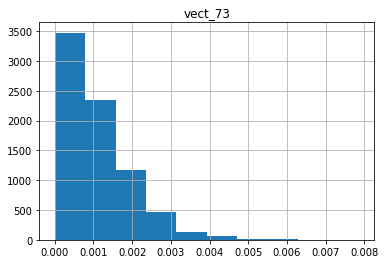

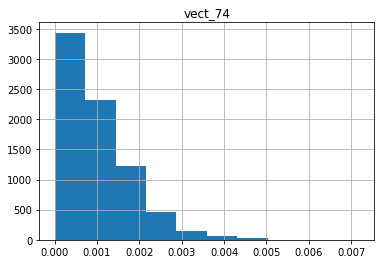

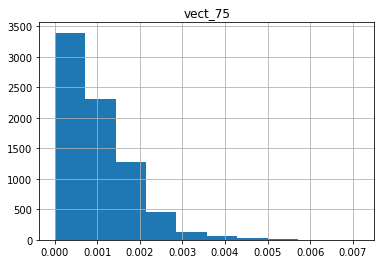

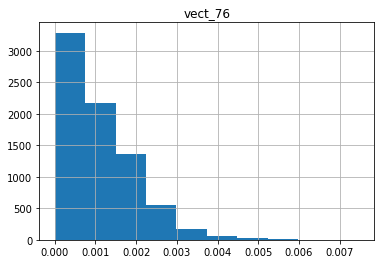

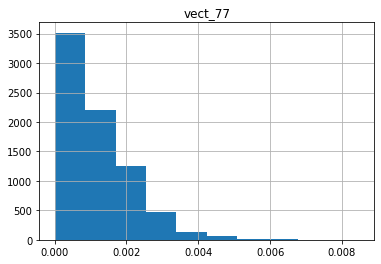

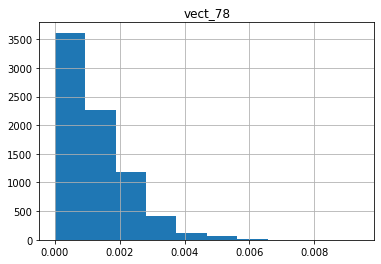

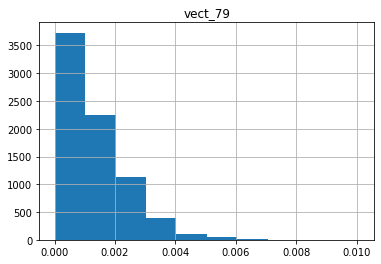

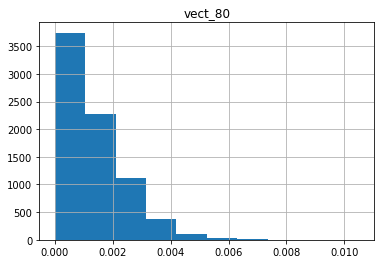

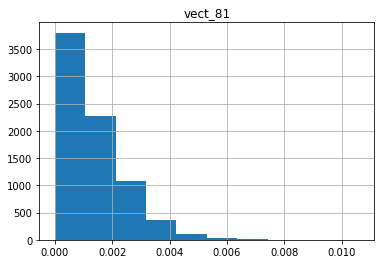

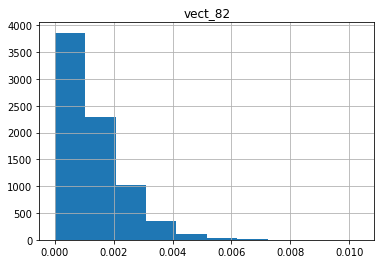

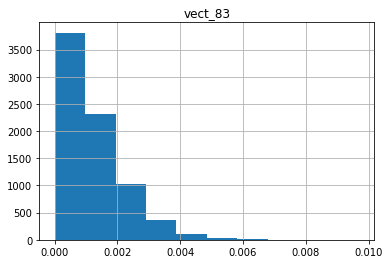

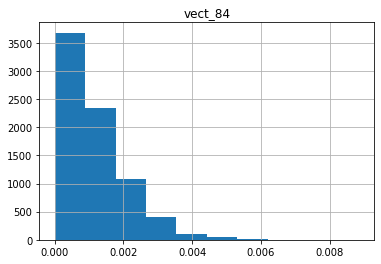

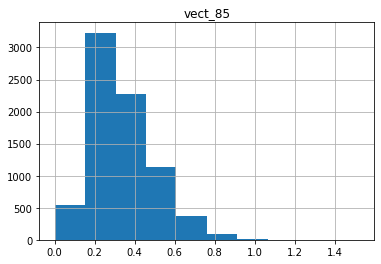

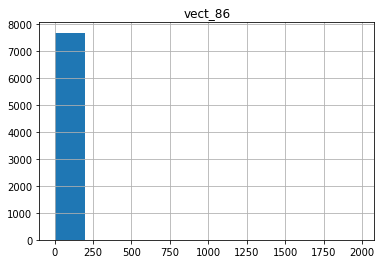

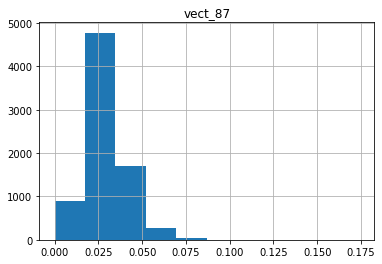

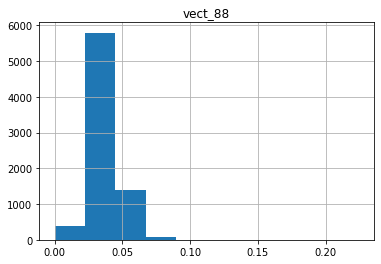

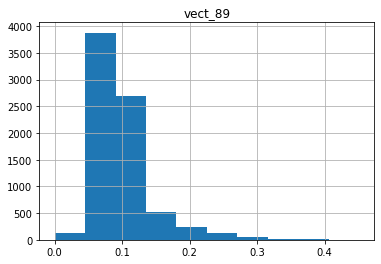

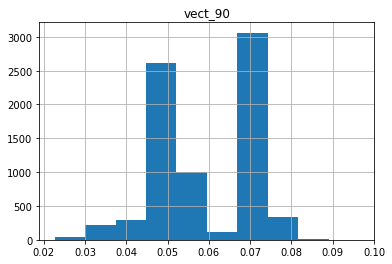

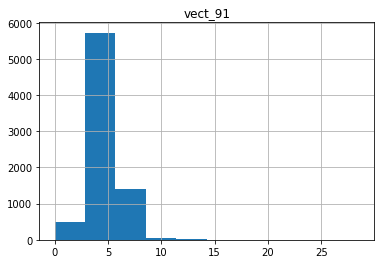

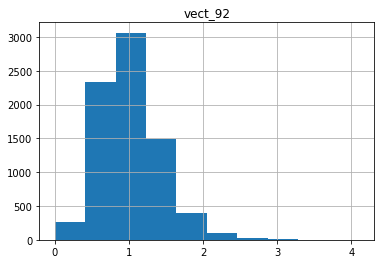

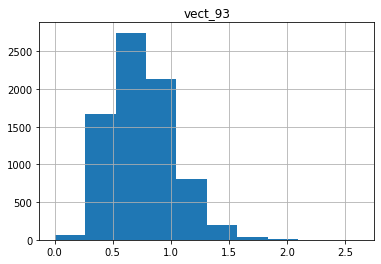

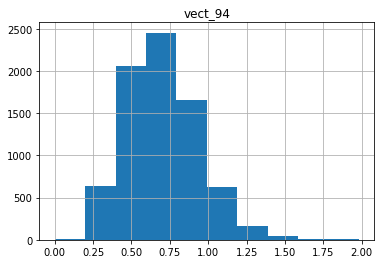

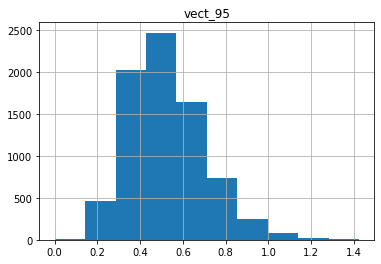

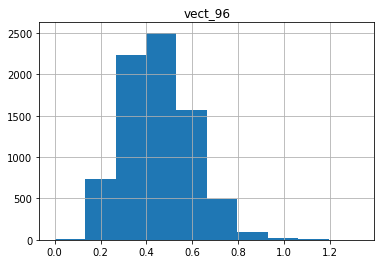

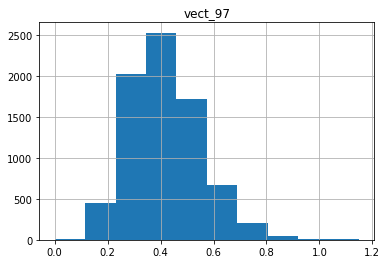

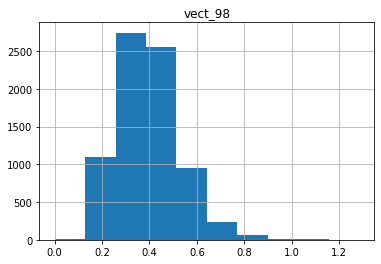

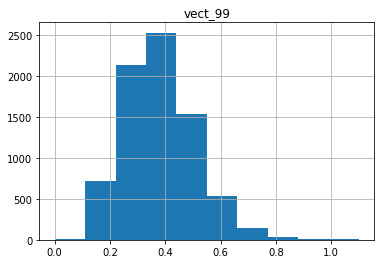

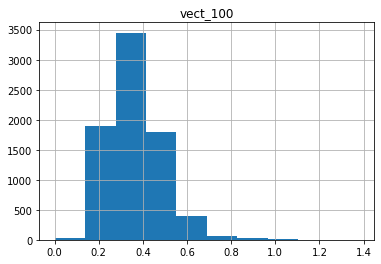

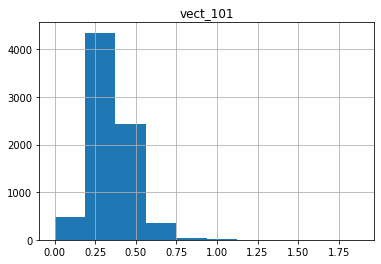

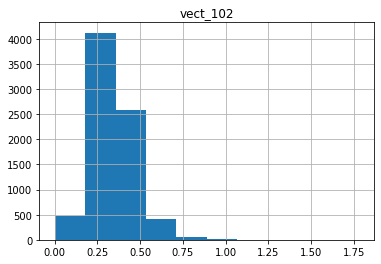

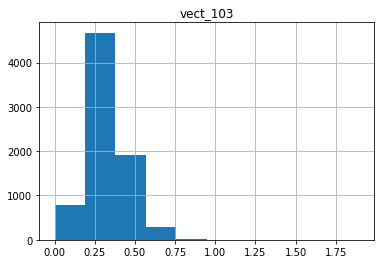

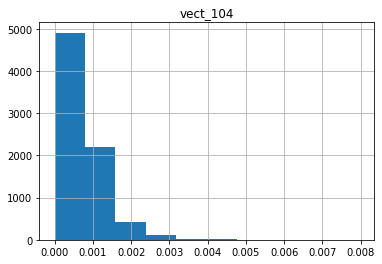

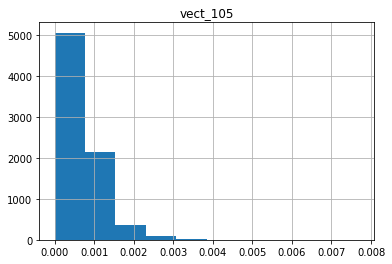

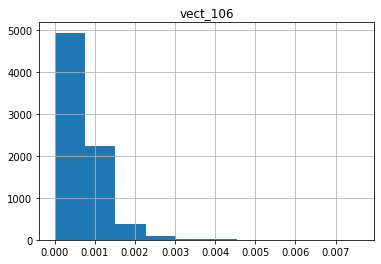

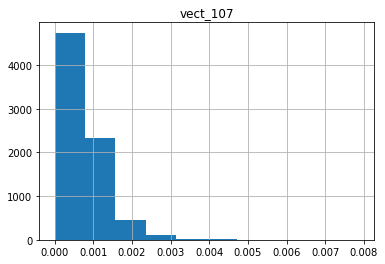

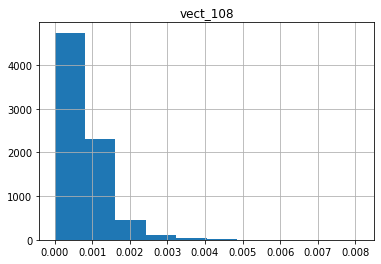

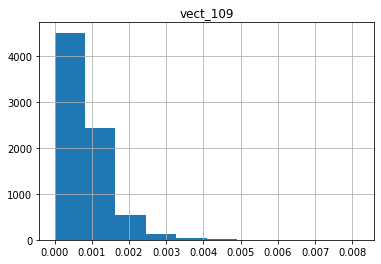

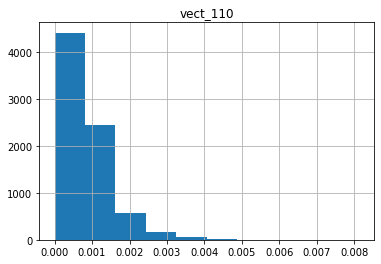

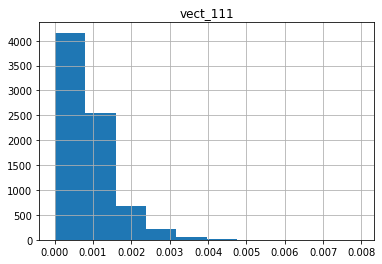

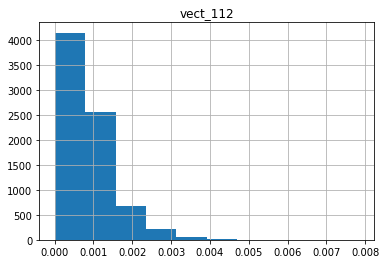

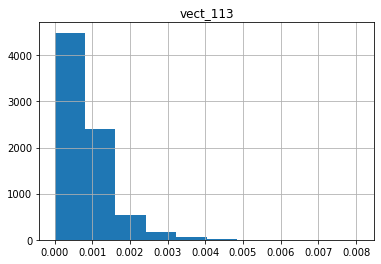

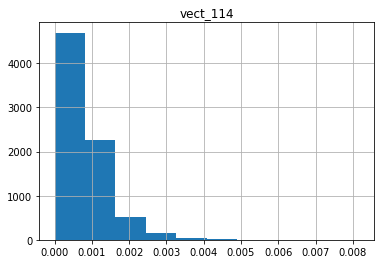

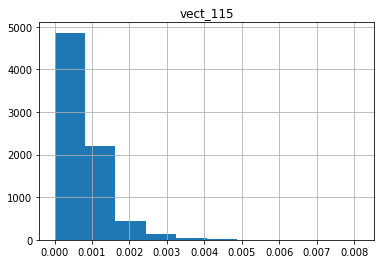

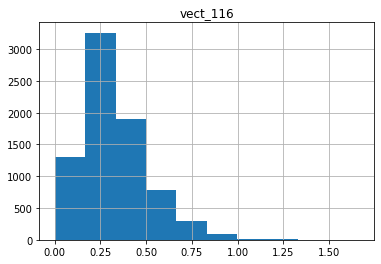

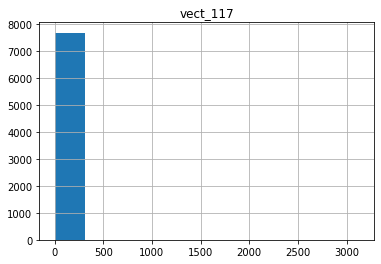

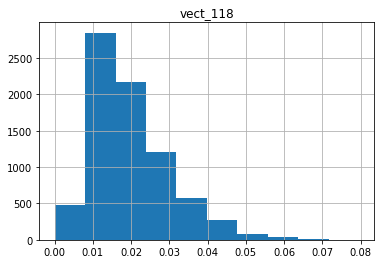

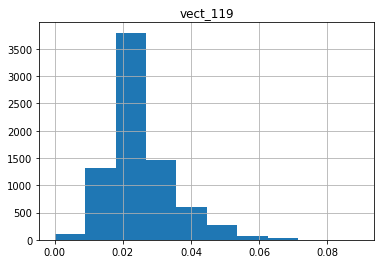

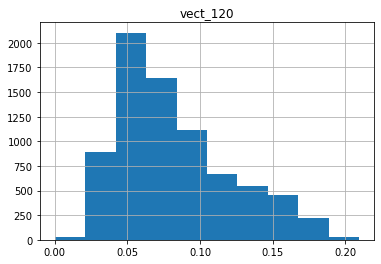

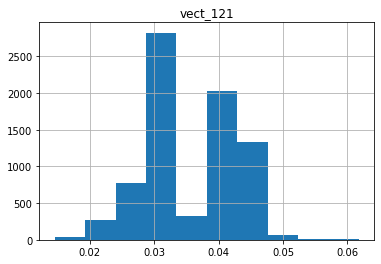

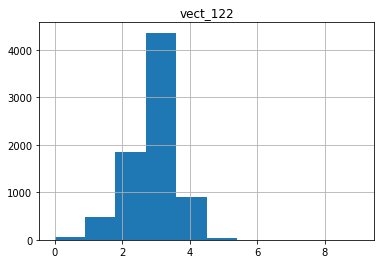

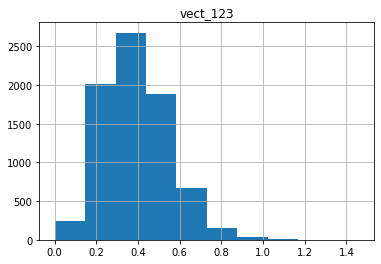

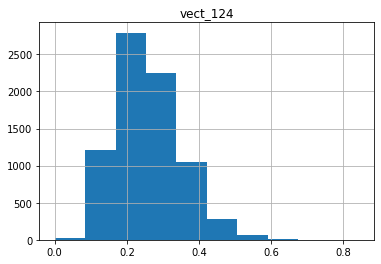

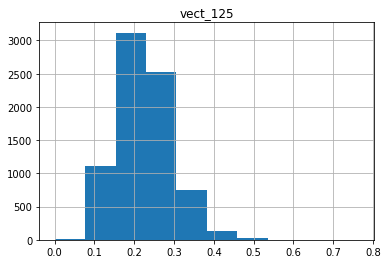

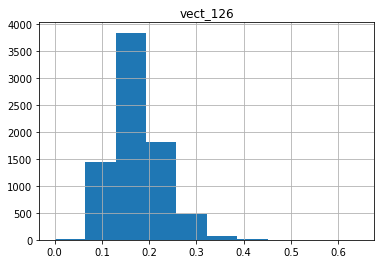

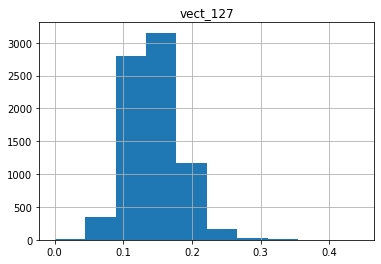

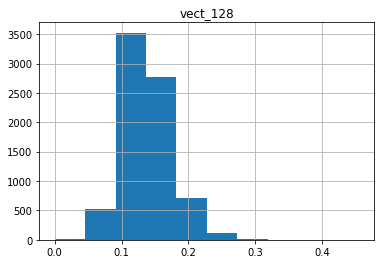

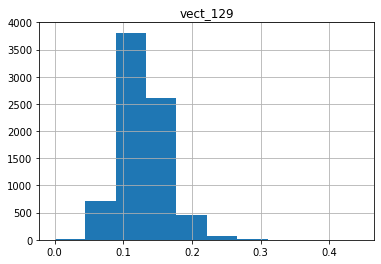

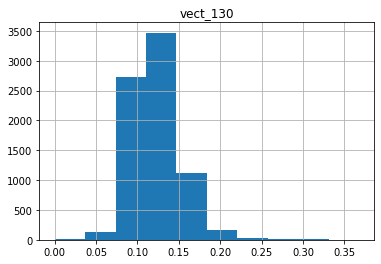

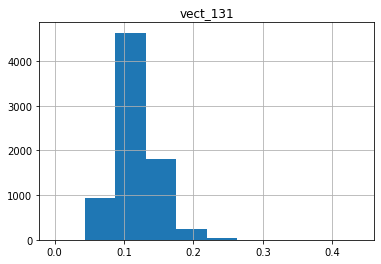

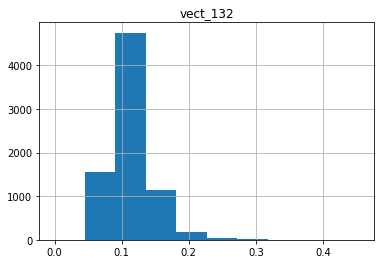

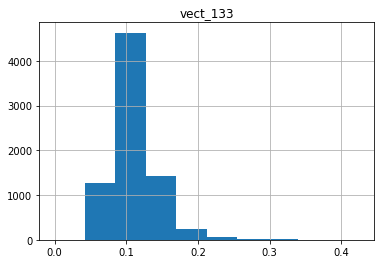

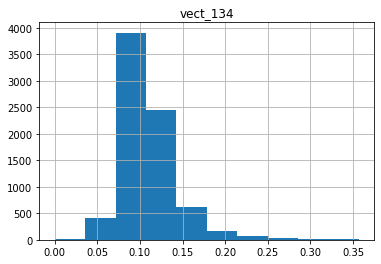

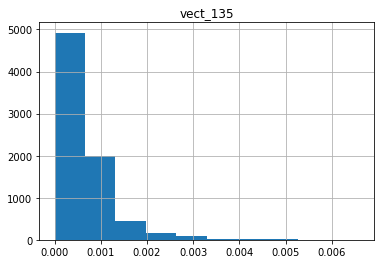

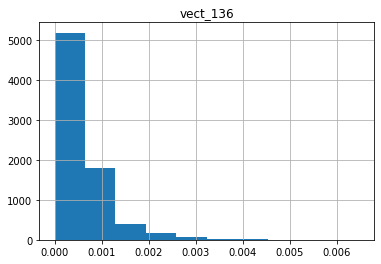

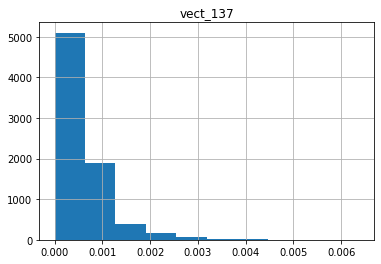

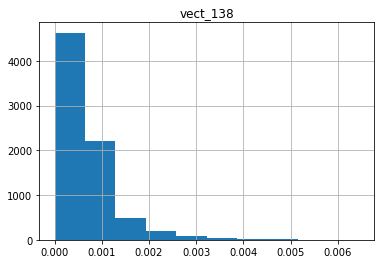

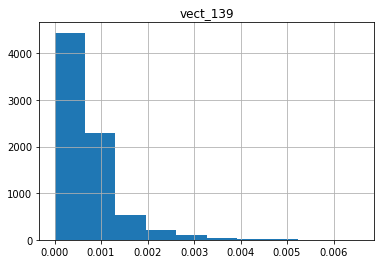

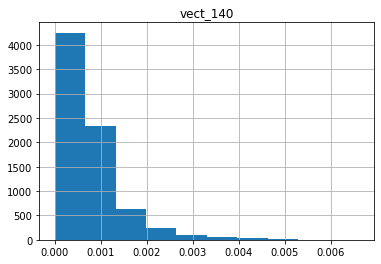

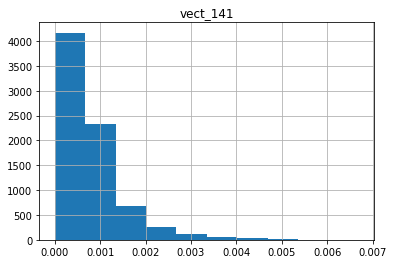

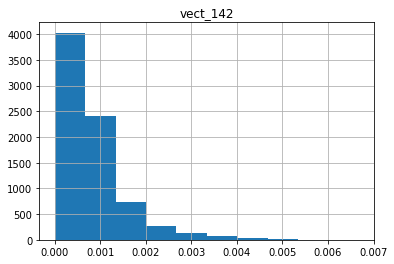

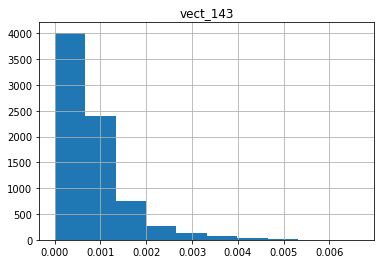

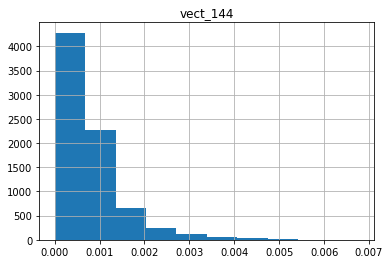

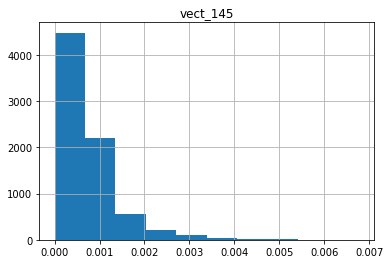

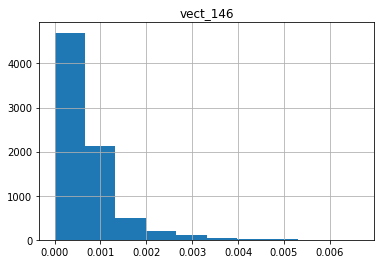

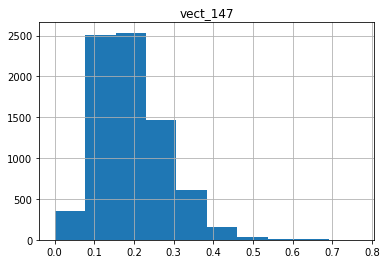

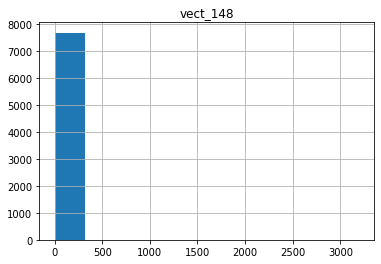

In [19]:
for attribute in train_features_num:
    train_features_num.hist(column = attribute)
    train_features_num[attribute].value_counts() / train_features_num[attribute].count()

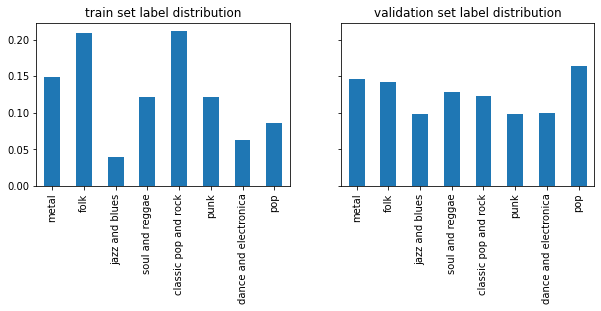

In [211]:
xs = train_labels["genre"].unique()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,3))
ax1.set_title('trainingg set label distribution')
(train_labels["genre"].value_counts() / sum(train_labels["genre"].value_counts().sort_index()))[xs].plot(ax=ax1, kind='bar')

ax2.set_title('trainingg set label distribution')
(valid_labels["genre"].value_counts() / sum(valid_labels["genre"].value_counts().sort_index()))[xs].plot(ax=ax2, kind='bar')
plt.show()

## Scatter Plot

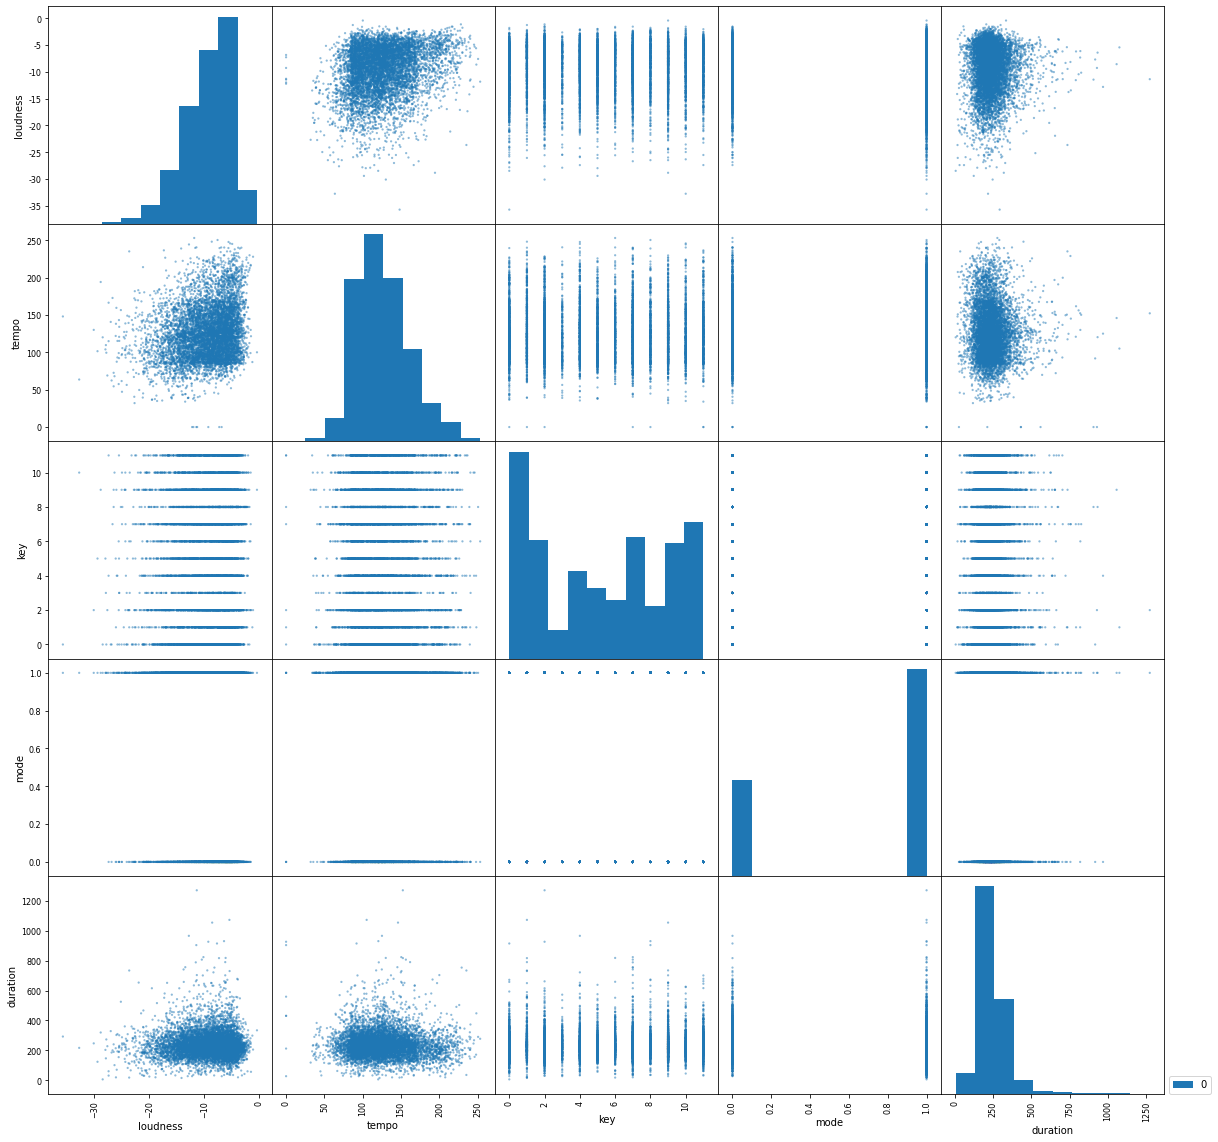

In [22]:
g = pd.plotting.scatter_matrix(train_metadata,
                               alpha=0.5, 
                               figsize=(20, 20), 
                               marker='o', 
                               s=5,
                               range_padding=0.15,
                              )
plt.legend([0, 1], loc=(1.02,0))
plt.show()

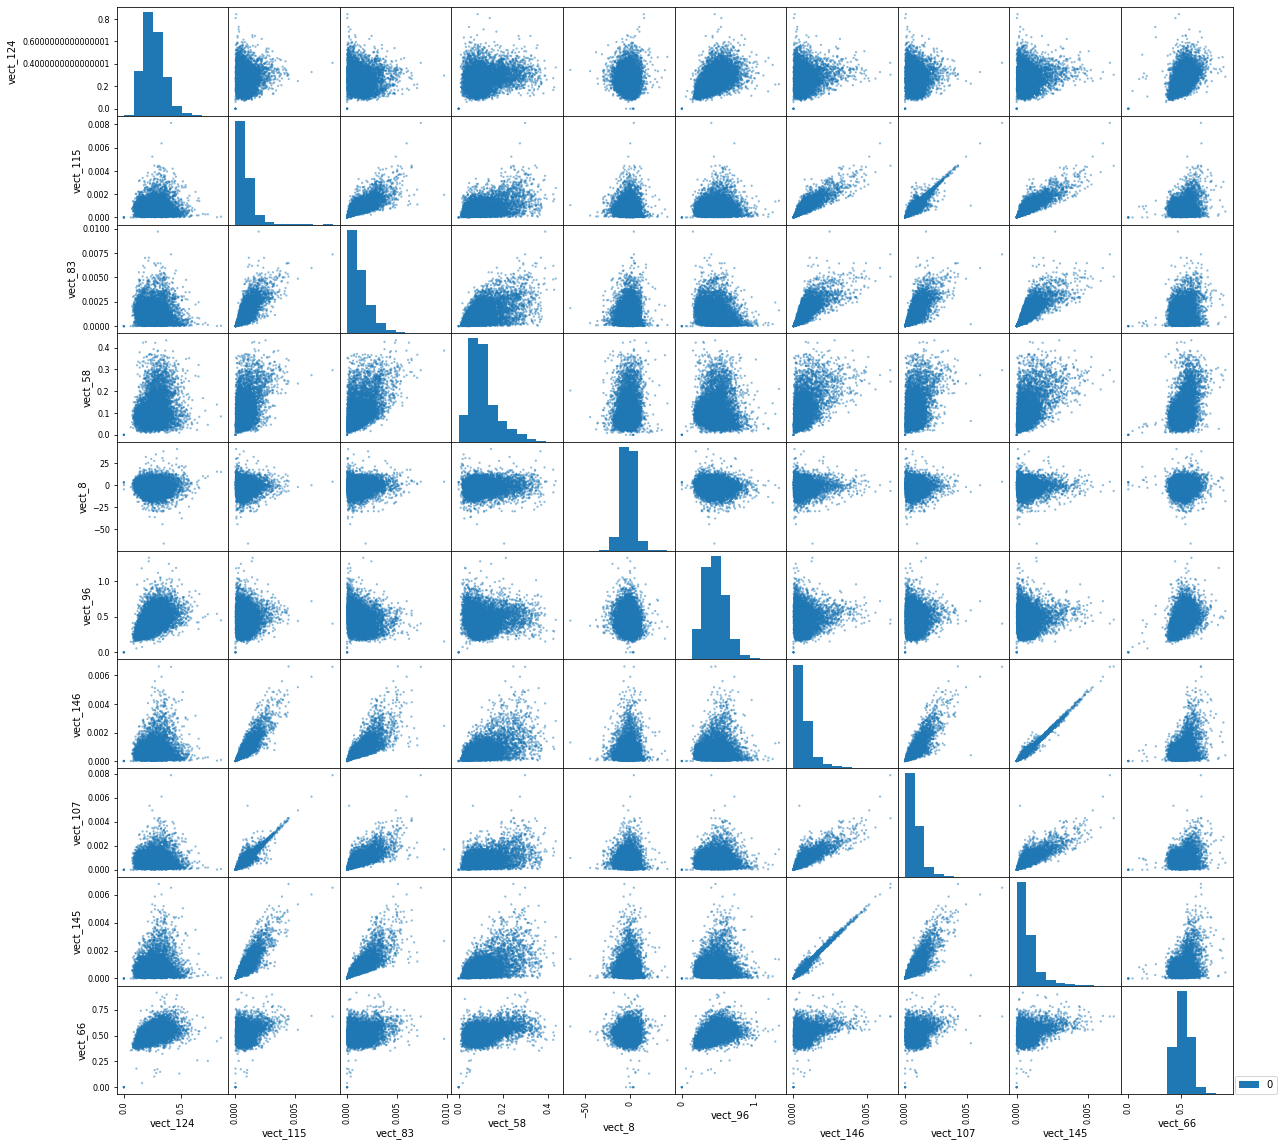

In [23]:
g = pd.plotting.scatter_matrix(train_audio.sample(n=10,axis='columns'),
                               alpha=0.5, 
                               figsize=(20, 20), 
                               marker='o', 
                               s=5,
                               range_padding=0.15,
                              )
plt.legend([0, 1], loc=(1.02,0))
plt.show()

## Correlation

In [24]:
train_metadata_corr = train_metadata.corr()
train_metadata_corr

loudness     tempo       key      mode  duration
loudness  1.000000  0.214292  0.043003 -0.082034  0.033833
tempo     0.214292  1.000000  0.007539 -0.020649 -0.041976
key       0.043003  0.007539  1.000000 -0.170470  0.030415
mode     -0.082034 -0.020649 -0.170470  1.000000 -0.102387
duration  0.033833 -0.041976  0.030415 -0.102387  1.000000

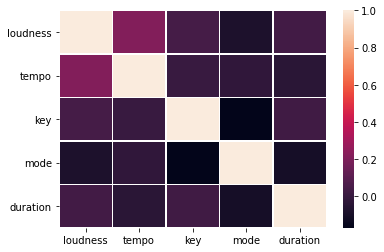

In [25]:
plt.figure()
sns.heatmap(train_metadata_corr, linewidths=.5)
plt.show()

In [26]:
train_audio_corr = train_audio.corr()
train_audio_corr

vect_1    vect_2    vect_3    vect_4    vect_5    vect_6  \
vect_1    1.000000  0.613471  0.361311  0.143216 -0.380902 -0.459982   
vect_2    0.613471  1.000000  0.157824  0.178521 -0.374714 -0.274621   
vect_3    0.361311  0.157824  1.000000  0.363953 -0.145629 -0.092559   
vect_4    0.143216  0.178521  0.363953  1.000000  0.009060  0.313452   
vect_5   -0.380902 -0.374714 -0.145629  0.009060  1.000000  0.212061   
...            ...       ...       ...       ...       ...       ...   
vect_144  0.314610  0.157039 -0.162313  0.175525  0.059518 -0.005738   
vect_145  0.301641  0.141235 -0.157339  0.170650  0.073092  0.007066   
vect_146  0.290895  0.131846 -0.159214  0.163229  0.080435  0.013692   
vect_147 -0.201117 -0.106270  0.141493  0.286309  0.266447  0.358942   
vect_148 -0.055892 -0.040140  0.016322  0.027866  0.063400  0.052249   

            vect_7    vect_8    vect_9   vect_10  ...  vect_139  vect_140  \
vect_1    0.263894  0.082942  0.254093  0.323874  ...  0.314225  0.319039   
vect_2    0.193458  0.214211  0.169769  0.546503  ...  0.151462  0.152527   
vect_3    0.074088  0.204326  0.094127  0.076741  ... -0.161485 -0.161256   
vect_4    0.321836  0.086015 -0.029708  0.130211  ...  0.170677  0.173420   
vect_5   -0.162620 -0.045031 -0.281771 -0.300248  ...  0.062352  0.061043   
...            ...       ...       ...       ...  ...       ...       ...   
vect_144  0.181938  0.064768 -0.008588  0.133705  ...  0.978431  0.983711   
vect_145  0.172360  0.062872 -0.013435  0.122321  ...  0.976421  0.980851   
vect_146  0.159994  0.057652 -0.018299  0.110753  ...  0.977044  0.976298   
vect_147  0.015205  0.132268 -0.091160 -0.013736  ... -0.060261 -0.054083   
vect_148 -0.020291  0.042622 -0.021707  0.011867  ... -0.013623 -0.014569   

          vect_141  vect_142  vect_143  vect_144  vect_145  vect_146  \
vect_1    0.322335  0.326845  0.326263  0.314610  0.301641  0.290895   
vect_2    0.162283  0.162617  0.161682  0.157039  0.141235  0.131846   
vect_3   -0.167079 -0.164305 -0.165085 -0.162313 -0.157339 -0.159214   
vect_4    0.176283  0.178513  0.176228  0.175525  0.170650  0.163229   
vect_5    0.050678  0.050150  0.054917  0.059518  0.073092  0.080435   
...            ...       ...       ...       ...       ...       ...   
vect_144  0.989278  0.990897  0.993173  1.000000  0.992284  0.983504   
vect_145  0.983386  0.983387  0.985481  0.992284  1.000000  0.991064   
vect_146  0.976955  0.974458  0.975088  0.983504  0.991064  1.000000   
vect_147 -0.062354 -0.054693 -0.054480 -0.061252 -0.055069 -0.059686   
vect_148 -0.016235 -0.015466 -0.015176 -0.015479 -0.012652 -0.012287   

          vect_147  vect_148  
vect_1   -0.201117 -0.055892  
vect_2   -0.106270 -0.040140  
vect_3    0.141493  0.016322  
vect_4    0.286309  0.027866  
vect_5    0.266447  0.063400  
...            ...       ...  
vect_144 -0.061252 -0.015479  
vect_145 -0.055069 -0.012652  
vect_146 -0.059686 -0.012287  
vect_147  1.000000  0.182118  
vect_148  0.182118  1.000000  

[148 rows x 148 columns]

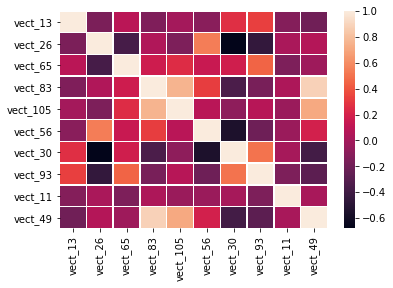

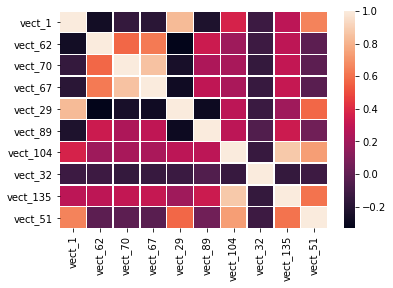

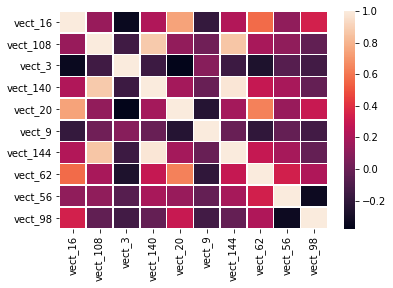

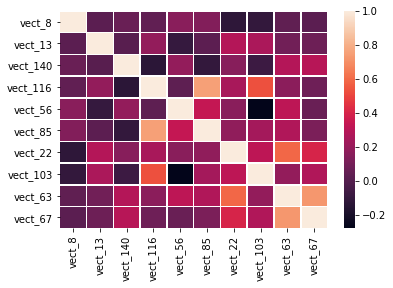

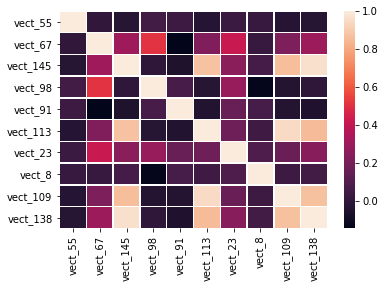

In [27]:
for i in range(5):
    train_audio_corr = train_audio.sample(n=10,axis='columns').corr()
    plt.figure()
    sns.heatmap(train_audio_corr, linewidths=.5)
    plt.show()

## Box plot

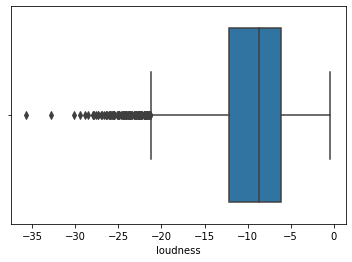

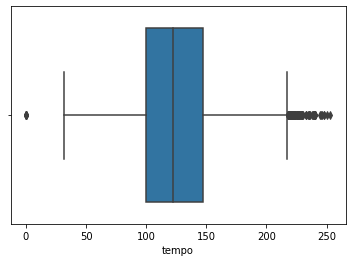

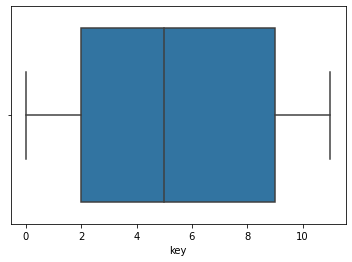

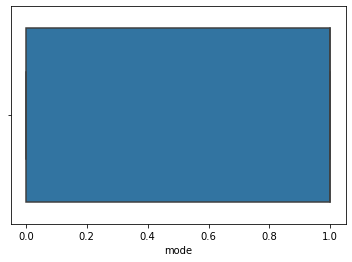

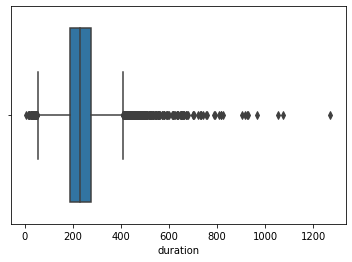

In [28]:
for attribute in train_metadata:
    sns.boxplot(x=attribute, data=train_metadata)
    plt.show()

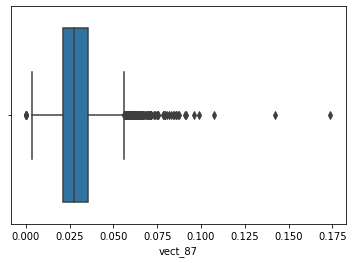

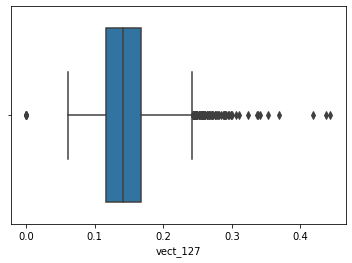

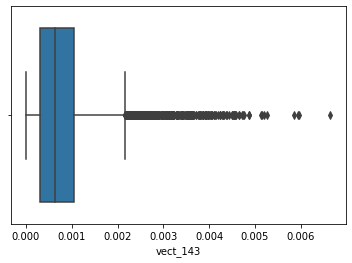

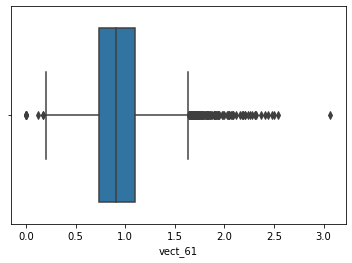

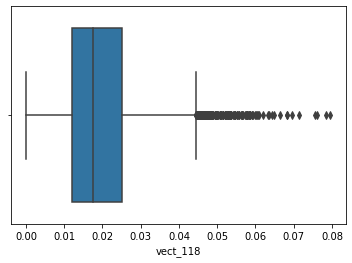

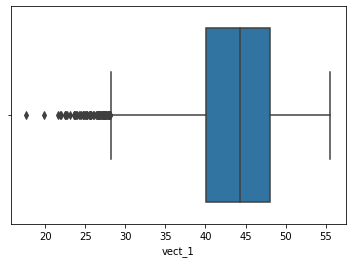

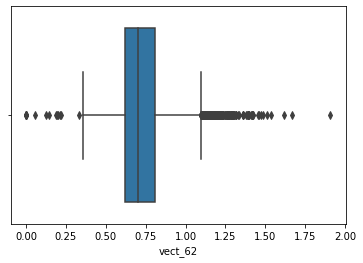

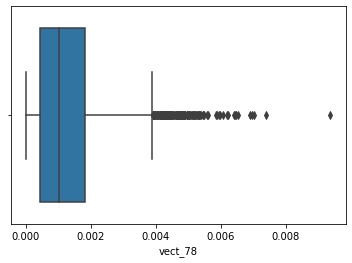

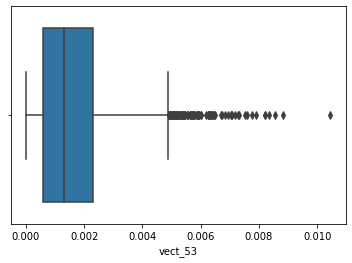

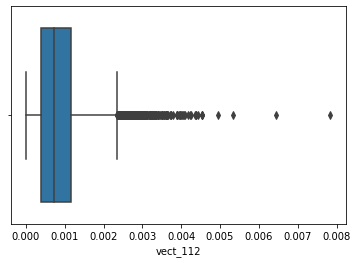

In [29]:
for attribute in train_audio.sample(n=10,axis='columns'):
    sns.boxplot(x=attribute, data=train_audio)
    plt.show()

## Normalization

In [30]:
def standard_continuous(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)

In [31]:
def transform_continuous_0_1(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    return pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)

In [32]:
train_metadata_normalized = transform_continuous_0_1(train_metadata)
train_metadata_normalized

loudness     tempo       key  mode  duration
trackID                                              
8424     0.931751  0.521542  0.000000   1.0  0.231245
7923     0.693164  0.539488  0.363636   1.0  0.191683
2314     0.815417  0.288014  0.636364   1.0  0.178235
810      0.656292  0.297906  0.545455   1.0  0.304016
439      0.599230  0.530877  0.454545   0.0  0.221757
...           ...       ...       ...   ...       ...
6419     0.705936  0.579459  0.636364   1.0  0.182566
6811     0.905273  0.607661  0.545455   1.0  0.131474
1474     0.675210  0.389652  0.909091   1.0  0.197644
8343     0.912098  0.401678  0.363636   0.0  0.428498
8454     0.807346  0.472605  0.727273   1.0  0.174295

[7678 rows x 5 columns]

In [33]:
train_audio_normalized = transform_continuous_0_1(train_audio)
train_audio_normalized

vect_1    vect_2    vect_3    vect_4    vect_5    vect_6    vect_7  \
trackID                                                                         
8424     0.907430  0.815628  0.538902  0.378867  0.472876  0.168951  0.633697   
7923     0.550130  0.594216  0.451753  0.294376  0.696488  0.347998  0.519783   
2314     0.732849  0.770759  0.552870  0.343134  0.566838  0.430684  0.529040   
810      0.657040  0.795641  0.550875  0.332246  0.414766  0.224798  0.572689   
439      0.488835  0.668303  0.521850  0.353938  0.547181  0.334990  0.580330   
...           ...       ...       ...       ...       ...       ...       ...   
6419     0.596759  0.561336  0.538219  0.521685  0.450440  0.524828  0.665080   
6811     0.899963  0.845538  0.471956  0.330200  0.404856  0.256002  0.498241   
1474     0.597466  0.714706  0.535208  0.349992  0.478676  0.354285  0.501489   
8343     0.923762  0.816346  0.566185  0.372376  0.501186  0.238728  0.519774   
8454     0.782260  0.795383  0.556084  0.410407  0.255480  0.357172  0.594231   

           vect_8    vect_9   vect_10  ...  vect_139  vect_140  vect_141  \
trackID                                ...                                 
8424     0.572551  0.540117  0.695003  ...  0.167609  0.175563  0.182890   
7923     0.605324  0.352578  0.480602  ...  0.017876  0.020263  0.021947   
2314     0.611436  0.424905  0.626819  ...  0.146982  0.181914  0.181248   
810      0.668349  0.431234  0.626847  ...  0.025516  0.027673  0.029561   
439      0.645958  0.455588  0.667764  ...  0.012834  0.013458  0.014034   
...           ...       ...       ...  ...       ...       ...       ...   
6419     0.600427  0.429081  0.493872  ...  0.195875  0.205504  0.212302   
6811     0.603101  0.488727  0.722681  ...  0.089840  0.094964  0.094506   
1474     0.581993  0.394238  0.544146  ...  0.024905  0.024044  0.024485   
8343     0.559259  0.463197  0.645172  ...  0.141176  0.149856  0.144521   
8454     0.568886  0.545502  0.676776  ...  0.113369  0.132769  0.146910   

         vect_142  vect_143  vect_144  vect_145  vect_146  vect_147  vect_148  
trackID                                                                        
8424     0.187219  0.186305  0.177365  0.166913  0.156815  0.136245  0.000105  
7923     0.024095  0.023627  0.018592  0.017873  0.020205  0.161735  0.000487  
2314     0.172403  0.154251  0.137672  0.123781  0.130730  0.406533  0.002453  
810      0.030679  0.030549  0.029069  0.027031  0.024729  0.150786  0.000124  
439      0.014966  0.014748  0.013133  0.012260  0.011761  0.242601  0.000461  
...           ...       ...       ...       ...       ...       ...       ...  
6419     0.216552  0.215199  0.212188  0.212260  0.222256  0.239974  0.000866  
6811     0.098623  0.096764  0.091338  0.083013  0.079312  0.098308  0.000068  
1474     0.025890  0.025884  0.024199  0.022747  0.024578  0.220567  0.000559  
8343     0.147710  0.146877  0.136491  0.130576  0.128166  0.236245  0.000798  
8454     0.155343  0.155154  0.141508  0.120827  0.101779  0.173761  0.000300  

[7678 rows x 148 columns]

## Merge with genre

In [34]:
train_merged = train_features.merge(train_labels, left_index=True, right_index=True)
train_merged

title  \
trackID                                    
8424             The Calamity [Explicit]   
7923                      Try To Find Me   
2314                Poor Old Dirt Farmer   
810                          Texas Flood   
439                    Chopsticks Medley   
...                                  ...   
6419                     Stop That Train   
6811                In A Close Encounter   
1474     Our Lady Of Sorrow (LP Version)   
8343                           Section X   
8454               Regular Dose Of Azure   

                                                      tags  loudness    tempo  \
trackID                                                                         
8424     the, you, to, a, not, in, of, that, are, we, w...    -2.824  131.969   
7923     i, the, you, to, and, a, me, it, not, in, my, ...   -11.249  136.510   
2314     the, to, and, a, in, is, on, all, no, have, bu...    -6.932   72.878   
810      i, the, you, to, and, a, me, it, not, in, my, ...   -12.551   75.381   
439      i, to, and, me, love, but, with, oh, they, she...   -14.566  134.331   
...                                                    ...       ...      ...   
6419     i, the, to, and, a, it, not, my, that, do, am,...   -10.798  146.624   
6811     i, the, to, a, in, my, of, so, with, they, see...    -3.759  153.760   
1474     i, the, you, to, and, a, not, in, is, of, that...   -11.883   98.596   
8343     i, the, you, to, and, a, me, in, my, is, of, y...    -3.518  101.639   
8454     i, the, to, and, a, me, not, in, my, is, of, t...    -7.217  119.586   

         time_signature  key  mode   duration     vect_1     vect_2  ...  \
trackID                                                              ...   
8424                  4    0     1  298.13506  52.050795  55.591771  ...   
7923                  4    4     1  248.03220  38.488583 -38.186087  ...   
2314                  4    7     1  231.00036  45.424130  36.587988  ...   
810                   3    6     1  390.29506  42.546616  47.126411  ...   
439                   4    5     0  286.11873  36.161980  -6.806859  ...   
...                 ...  ...   ...        ...        ...        ...  ...   
6419                  1    7     1  236.48608  40.258501 -52.111872  ...   
6811                  4    6     1  171.78077  51.767393  68.259900  ...   
1474                  4   10     1  255.58159  40.285352  12.846995  ...   
8343                  4    4     0  547.94404  52.670728  55.895759  ...   
8454                  4    8     1  226.01098  47.299664  47.017187  ...   

         vect_140  vect_141  vect_142  vect_143  vect_144  vect_145  vect_146  \
trackID                                                                         
8424     0.001161  0.001225  0.001251  0.001238  0.001202  0.001130  0.001040   
7923     0.000134  0.000147  0.000161  0.000157  0.000126  0.000121  0.000134   
2314     0.001203  0.001214  0.001152  0.001025  0.000933  0.000838  0.000867   
810      0.000183  0.000198  0.000205  0.000203  0.000197  0.000183  0.000164   
439      0.000089  0.000094  0.000100  0.000098  0.000089  0.000083  0.000078   
...           ...       ...       ...       ...       ...       ...       ...   
6419     0.001359  0.001422  0.001447  0.001430  0.001438  0.001437  0.001474   
6811     0.000628  0.000633  0.000659  0.000643  0.000619  0.000562  0.000526   
1474     0.000159  0.000164  0.000173  0.000172  0.000164  0.000154  0.000163   
8343     0.000991  0.000968  0.000987  0.000976  0.000925  0.000884  0.000850   
8454     0.000878  0.000984  0.001038  0.001031  0.000959  0.000818  0.000675   

         vect_147  vect_148                 genre  
trackID                                            
8424     0.104525  0.335818                 metal  
7923     0.124080  1.553742                  folk  
2314     0.311885  7.835358                  folk  
810      0.115680  0.395675        jazz and blues  
439      0.186119  1.472794                  folk  
.

## Drop high correlated audio features

In [35]:
def drop_highly_correlated(data, threshold=0.3):
    corr_matrix = data.corr().abs()
    remained = [corr_matrix.columns[0]]
    for column in corr_matrix.columns[1:]:
        to_select = True
        for c in remained:
            if corr_matrix[column][c] >= threshold:
                to_select = False
        if to_select:
            remained.append(column)

    return data[remained]

train_audio_normalized_low_corr = drop_highly_correlated(train_audio_normalized)

valid_audio_normalized_low_corr = select_df1_columns_based_on_df2(valid_features, train_audio_normalized_low_corr)
valid_audio_normalized_low_corr = transform_continuous_0_1(valid_audio_normalized_low_corr)
train_audio_normalized_low_corr.corr()

vect_1    vect_4    vect_8    vect_9   vect_11   vect_12   vect_28  \
vect_1   1.000000  0.143216  0.082942  0.254093  0.153325 -0.167586 -0.135888   
vect_4   0.143216  1.000000  0.086015 -0.029708  0.293636 -0.185825  0.180864   
vect_8   0.082942  0.086015  1.000000 -0.122371 -0.251873 -0.095729 -0.129706   
vect_9   0.254093 -0.029708 -0.122371  1.000000 -0.019650  0.089415 -0.039546   
vect_11  0.153325  0.293636 -0.251873 -0.019650  1.000000  0.213998  0.021981   
vect_12 -0.167586 -0.185825 -0.095729  0.089415  0.213998  1.000000 -0.005021   
vect_28 -0.135888  0.180864 -0.129706 -0.039546  0.021981 -0.005021  1.000000   
vect_32 -0.125213 -0.270113 -0.158684  0.014363  0.017849  0.007400 -0.059309   
vect_35  0.041237 -0.143982  0.026654 -0.068363 -0.047907  0.056239  0.004506   
vect_36  0.123246 -0.057346  0.001975  0.178397  0.013849  0.069425 -0.051670   
vect_37  0.020191 -0.004109  0.092607  0.015619 -0.157042 -0.128340  0.043093   
vect_38  0.249180 -0.038031  0.118402  0.205017 -0.080726 -0.079521 -0.123882   
vect_39  0.176923  0.006549  0.116893  0.119039 -0.174763 -0.167215 -0.024224   
vect_41  0.036430  0.016927  0.034822  0.010816 -0.152472 -0.133916  0.061039   
vect_55 -0.037805  0.011349  0.023075 -0.005052 -0.008913  0.005443 -0.008465   
vect_58  0.062877  0.265278  0.099649 -0.024627 -0.141883 -0.166333  0.272766   
vect_88 -0.102857  0.089628  0.096239 -0.076337 -0.094346  0.001394 -0.166053   
vect_91 -0.171568 -0.049630  0.069155 -0.089513 -0.110107  0.019017 -0.130244   

          vect_32   vect_35   vect_36   vect_37   vect_38   vect_39   vect_41  \
vect_1  -0.125213  0.041237  0.123246  0.020191  0.249180  0.176923  0.036430   
vect_4  -0.270113 -0.143982 -0.057346 -0.004109 -0.038031  0.006549  0.016927   
vect_8  -0.158684  0.026654  0.001975  0.092607  0.118402  0.116893  0.034822   
vect_9   0.014363 -0.068363  0.178397  0.015619  0.205017  0.119039  0.010816   
vect_11  0.017849 -0.047907  0.013849 -0.157042 -0.080726 -0.174763 -0.152472   
vect_12  0.007400  0.056239  0.069425 -0.128340 -0.079521 -0.167215 -0.133916   
vect_28 -0.059309  0.004506 -0.051670  0.043093 -0.123882 -0.024224  0.061039   
vect_32  1.000000  0.132702  0.108337 -0.034128  0.053074  0.016505 -0.019420   
vect_35  0.132702  1.000000  0.112221  0.152352  0.142193  0.101443  0.042486   
vect_36  0.108337  0.112221  1.000000  0.046396  0.289810  0.030438 -0.012414   
vect_37 -0.034128  0.152352  0.046396  1.000000  0.075195  0.144799  0.090298   
vect_38  0.053074  0.142193  0.289810  0.075195  1.000000  0.237216  0.091376   
vect_39  0.016505  0.101443  0.030438  0.144799  0.237216  1.000000  0.228255   
vect_41 -0.019420  0.042486 -0.012414  0.090298  0.091376  0.228255  1.000000   
vect_55 -0.054762 -0.102722 -0.064258 -0.092024 -0.094816 -0.103164 -0.063750   
vect_58 -0.153974  0.145389  0.048125  0.135943  0.022988  0.102894  0.123798   
vect_88 -0.031807  0.018223 -0.012550  0.034909 -0.027282 -0.049231 -0.015886   
vect_91  0.020478 -0.019153  0.020607  0.006016 -0.020139 -0.027675 -0.023497   

          vect_55   vect_58   vect_88   vect_91  
vect_1  -0.037805  0.062877 -0.102857 -0.171568  
vect_4   0.011349  0.265278  0.089628 -0.049630  
vect_8   0.023075  0.099649  0.096239  0.069155  
vect_9  -0.005052 -0.024627 -0.076337 -0.089513  
vect_11 -0.008913 -0.141883 -0.094346 -0.110107  
vect_12  0.005443 -0.166333  0.001394  0.019017  
vect_28 -0.008465  0.272766 -0.166053 -0.130244  
vect_32 -0.054762 -0.153974 -0.031807  0.020478  
vect_35 -0.102722  0.145389  0.018223 -0.019153  
vect_36 -0.064258  0.048125 -0.012550  0.020607  
vect_37 -0.092024  0.135943  0.034909  0.006016  
vect_38 -0.094816  0.022988 -0.027282 -0.020139  
vect_39 -0.103164  0.102894 -0.049231 -0.027675  
vect_41 -0.063750  0.123798 -0.015886 -0.023497  
vect_55  1.000000 -0.027820  0.035655  0.037713  
vect_58 -0.027820  1.000000  0.160042 -0.041932  
vect_88  0.035655  0.160042  1.000000  0.220403  
vect_91  0.037713 -0.041932  0.

## Random forest metadata and low correlated audio features

In [36]:
train_meta = one_hot_encoding(train_metadata, "key")
train_continuous_meta_audio = pd.concat([train_meta, train_audio], axis=1)
train_continuous_0_1_meta_audio = transform_continuous_0_1(train_continuous_meta_audio)
train_continuous_0_1_meta_audio.describe()

loudness        tempo         mode     duration        key_0  \
count  7678.000000  7678.000000  7678.000000  7678.000000  7678.000000   
mean      0.742859     0.497992     0.684032     0.184862     0.130633   
std       0.124869     0.137136     0.464930     0.069662     0.337020   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.667110     0.395195     0.000000     0.144015     0.000000   
50%       0.766298     0.481870     1.000000     0.176894     0.000000   
75%       0.838943     0.581165     1.000000     0.214027     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             key_1        key_2        key_3        key_4        key_5  ...  \
count  7678.000000  7678.000000  7678.000000  7678.000000  7678.000000  ...   
mean      0.076713     0.118911     0.029174     0.088174     0.071112  ...   
std       0.266152     0.323705     0.168306     0.283566     0.257029  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

          vect_139     vect_140     vect_141     vect_142     vect_143  \
count  7678.000000  7678.000000  7678.000000  7678.000000  7678.000000   
mean      0.109946     0.116249     0.118736     0.122674     0.122849   
std       0.100459     0.104818     0.107537     0.109046     0.108972   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.042628     0.045101     0.045536     0.047740     0.047705   
50%       0.085561     0.089974     0.091221     0.095181     0.095410   
75%       0.140107     0.149403     0.152993     0.158037     0.158916   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          vect_144     vect_145     vect_146     vect_147     vect_148  
count  7678.000000  7678.000000  7678.000000  7678.000000  7678.000000  
mean      0.115867     0.110817     0.105557     0.252031     0.001624  
std       0.105794     0.102149     0.098619     0.111942     0.013328  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.044120     0.043131     0.041353     0.168768     0.000226  
50%       0.088682     0.084195     0.080066     0.233756     0.000493  
75%       0.148148     0.140473     0.132388     0.318338     0.001157  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 164 columns]

In [37]:
TOP_N_FEATURES = 10

sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000, 
                                             random_state=RANDOM_STATE, 
                                             criterion="entropy",
                                             max_depth=TOP_N_FEATURES))
sel.fit(train_continuous_0_1_meta_audio, train_labels.values.ravel())
sel.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,

In [38]:
selected_feature = train_continuous_0_1_meta_audio.columns[(sel.get_support())]
selected_feature

Index(['loudness', 'duration', 'vect_1', 'vect_2', 'vect_4', 'vect_5',
       'vect_6', 'vect_8', 'vect_10', 'vect_11', 'vect_14', 'vect_15',
       'vect_16', 'vect_18', 'vect_19', 'vect_20', 'vect_22', 'vect_23',
       'vect_24', 'vect_25', 'vect_27', 'vect_29', 'vect_30', 'vect_54',
       'vect_55', 'vect_56', 'vect_57', 'vect_58', 'vect_60', 'vect_61',
       'vect_62', 'vect_63', 'vect_65', 'vect_85', 'vect_86', 'vect_92',
       'vect_99', 'vect_101', 'vect_102', 'vect_103', 'vect_123', 'vect_128',
       'vect_129', 'vect_133', 'vect_134'],
      dtype='object')

In [39]:
train_random_forest_selected = train_continuous_0_1_meta_audio[selected_feature]
# train_random_forest_selected.corr()
valid_random_forest_selected = select_df1_columns_based_on_df2(valid_features, train_random_forest_selected)
valid_random_forest_selected = transform_continuous_0_1(valid_random_forest_selected)

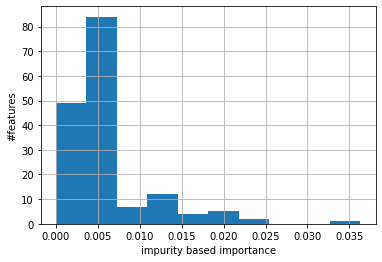

In [40]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()
plt.xlabel("impurity based importance")
plt.ylabel("#features")
plt.show()

## PCA

In [41]:
train_continuous_meta_audio = pd.concat([train_meta, train_audio], axis=1)
train_continuous_0_1_meta_audio = transform_continuous_0_1(train_continuous_meta_audio)

valid_continuous_0_1_meta_audio = select_df1_columns_based_on_df2(one_hot_encoding(valid_features, "key"),
                                                                  train_continuous_0_1_meta_audio
                                                                 )

test_continuous_0_1_meta_audio = select_df1_columns_based_on_df2(one_hot_encoding(test_features, "key"),
                                                                  train_continuous_0_1_meta_audio
                                                                 )

In [42]:
pca = PCA(n_components = 0.99)
pca.fit(train_continuous_0_1_meta_audio)
reduced = pca.transform(train_continuous_0_1_meta_audio)
train_meta_audio_pca = pd.DataFrame(reduced, index=train_continuous_0_1_meta_audio.index)

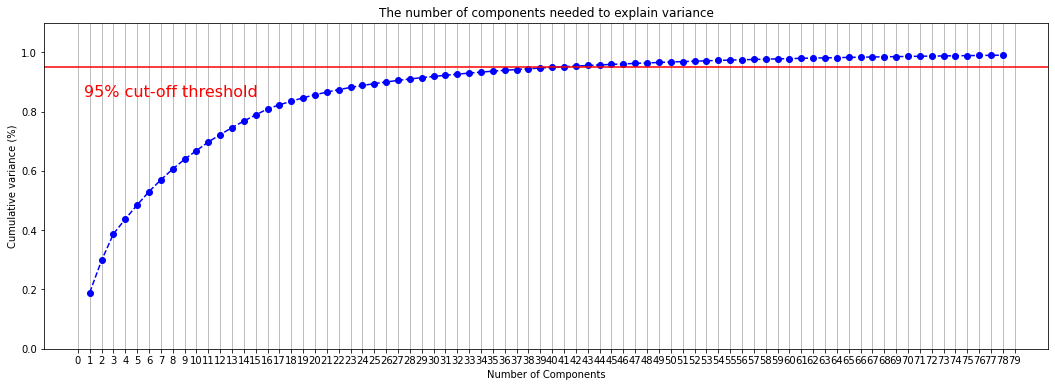

In [43]:
plt.rcParams["figure.figsize"] = (18,6)

fig, ax = plt.subplots()
xi = np.arange(1, 79, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 80, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [44]:
valid_meta_audio_pca = pd.DataFrame(pca.transform(valid_continuous_0_1_meta_audio), 
                                     index=valid_continuous_0_1_meta_audio.index)

test_meta_audio_pca = pd.DataFrame(pca.transform(test_continuous_0_1_meta_audio), 
                                     index=test_continuous_0_1_meta_audio.index)

In [45]:
train_meta_audio_pca_var95 = train_meta_audio_pca[train_meta_audio_pca.columns[0:43]]
valid_meta_audio_pca_var95 = valid_meta_audio_pca[valid_meta_audio_pca.columns[0:43]]
test_meta_audio_pca_var95  = test_meta_audio_pca[test_meta_audio_pca.columns[0:43]]

## Handle text features

In [46]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from nltk.tokenize import word_tokenize

In [47]:
train_text = train_features[['title', 'tags']]
train_text

title  \
trackID                                    
8424             The Calamity [Explicit]   
7923                      Try To Find Me   
2314                Poor Old Dirt Farmer   
810                          Texas Flood   
439                    Chopsticks Medley   
...                                  ...   
6419                     Stop That Train   
6811                In A Close Encounter   
1474     Our Lady Of Sorrow (LP Version)   
8343                           Section X   
8454               Regular Dose Of Azure   

                                                      tags  
trackID                                                     
8424     the, you, to, a, not, in, of, that, are, we, w...  
7923     i, the, you, to, and, a, me, it, not, in, my, ...  
2314     the, to, and, a, in, is, on, all, no, have, bu...  
810      i, the, you, to, and, a, me, it, not, in, my, ...  
439      i, to, and, me, love, but, with, oh, they, she...  
...                                                    ...  
6419     i, the, to, and, a, it, not, my, that, do, am,...  
6811     i, the, to, a, in, my, of, so, with, they, see...  
1474     i, the, you, to, and, a, not, in, is, of, that...  
8343     i, the, you, to, and, a, me, in, my, is, of, y...  
8454     i, the, to, and, a, me, not, in, my, is, of, t...  

[7678 rows x 2 columns]

In [48]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [49]:
def clean_tag(allTags):
    newTags = []
    for eachTag in allTags:
        eachTag = remove_punctuations(eachTag)
        newTags.append(eachTag)

    return np.array(newTags) 

In [50]:
def clean_title(allTitles):
    newTitles = []
    for eachTitle in allTitles:
        trantab = str.maketrans({key: None for key in string.punctuation})
        eachTitle = eachTitle.translate(trantab)
        eachTitle = re.sub('\d+','',eachTitle)
        newTitles.append(eachTitle)
    return np.array(newTitles) 

In [154]:
def computeTFIDF(trainCorpus,corpus,note):
    if(note == 'tag'):
        corpus = clean_tag(corpus)
        trainCorpus = clean_tag(trainCorpus)
    if(note == 'title'):
        corpus = clean_title(corpus)
        trainCorpus = clean_title(trainCorpus)
    vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
    tfidf = vectorizer.fit(trainCorpus)
    vectors = tfidf.transform(corpus)
    word = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns = word)

    return df

In [155]:
def scale_data(X_train, X):
    header = X_train.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit(X_train)
    X = min_max_scaler.transform(X)
    X = pd.DataFrame(X, columns=header)
    return X 

In [53]:
# tag: haven't tfidf
tag_for_train = (train_features.iloc[:,1]).values
tag_for_valid = (valid_features.iloc[:,1]).values
tag_for_test = (test_features.iloc[:,1]).values

# title: haven't tfidf
title_for_train = (train_features.iloc[:,0]).values
title_for_valid = (valid_features.iloc[:,0]).values
title_for_test = (test_features.iloc[:,0]).values

# title: tfidf
train_title = computeTFIDF(title_for_train,title_for_train,'title').set_index(train_features.index)
valid_title = computeTFIDF(title_for_train,title_for_valid,'title').set_index(valid_features.index)
test_title = computeTFIDF(title_for_train,title_for_test,'title').set_index(test_features.index)

# tag: tfidf
train_tag = computeTFIDF(tag_for_train,tag_for_train,'tag').set_index(train_features.index)
valid_tag = computeTFIDF(tag_for_train,tag_for_valid,'tag').set_index(valid_features.index)
test_tag = computeTFIDF(tag_for_train,tag_for_test,'tag').set_index(test_features.index)

In [54]:
train_tag

0    1   10  100   12   13   15   16    2   20  ...    â   är    å  \
trackID                                                    ...                  
8424     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7923     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2314     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
810      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
439      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6419     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6811     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1474     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8343     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8454     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

          ça    è    é   él  était  être  über  
trackID                                         
8424     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
7923     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
2314     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
810      0.0  0.0  0.0  0.0    0.0   0.0   0.0  
439      0.0  0.0  0.0  0.0    0.0   0.0   0.0  
...      ...  ...  ...  ...    ...   ...   ...  
6419     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
6811     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
1474     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
8343     0.0  0.0  0.0  0.0    0.0   0.0   0.0  
8454     0.0  0.0  0.0  0.0    0.0   0.0   0.0  

[7678 rows x 4868 columns]

In [55]:
train_all = pd.concat([train_tag, train_features_num], axis=1, sort=False)
valid_all = pd.concat([valid_tag, valid_features_num], axis=1, sort=False)
test_all = pd.concat([test_tag, test_features_num], axis=1, sort=False)

In [56]:
train_all_title = pd.concat([train_title, train_tag, train_features_num], axis=1, sort=False)
valid_all_title = pd.concat([valid_title, valid_tag, valid_features_num], axis=1, sort=False)
test_all_title = pd.concat([test_title, test_tag, test_features_num], axis=1, sort=False)

## Random forest all features

In [57]:
TOP_N_FEATURES = 10

sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000, 
                                             random_state=RANDOM_STATE, 
                                             criterion="entropy",
                                             max_depth=TOP_N_FEATURES))
sel.fit(train_all, train_labels.values.ravel())
sel.get_support()

array([False, False, False, ...,  True,  True,  True])

In [58]:
selected_feature = train_all.columns[(sel.get_support())]
selected_feature

Index(['a', 'about', 'again', 'al', 'all', 'alway', 'am', 'amor', 'an', 'and',
       ...
       'vect_139', 'vect_140', 'vect_141', 'vect_142', 'vect_143', 'vect_144',
       'vect_145', 'vect_146', 'vect_147', 'vect_148'],
      dtype='object', length=339)

In [187]:
train_all_random_forest_selected = train_all[selected_feature]
valid_all_random_forest_selected = valid_all[selected_feature]

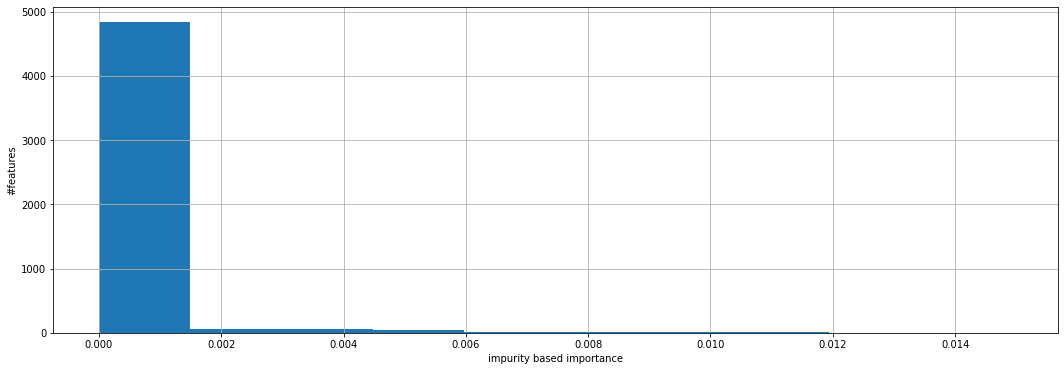

In [60]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()
plt.xlabel("impurity based importance")
plt.ylabel("#features")
plt.show()

# Models

In [61]:
def draw_train_valid_label_distribution(train_labels: pd.DataFrame, valid_labels: pd.DataFrame, 
                                        title1='train set label distribution',
                                        title2='validation set label distribution'):
    xs = train_labels["genre"].unique()

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,3))
    ax1.set_title(title1)
    (train_labels["genre"].value_counts() / sum(train_labels["genre"].value_counts().sort_index()))[xs].plot(ax=ax1, kind='bar')

    ax2.set_title(title2)
    (valid_labels["genre"].value_counts() / sum(valid_labels["genre"].value_counts().sort_index()))[xs].plot(ax=ax2, kind='bar')
    plt.show()

## Decision tree for metadata features

                       precision    recall  f1-score   support

      soul and reggae       0.12      0.40      0.18        55
 classic pop and rock       0.22      0.04      0.07        45
                metal       0.25      0.45      0.33        64
                 folk       0.17      0.02      0.04        44
                  pop       0.56      0.44      0.49        66
dance and electronica       0.33      0.03      0.05        74
       jazz and blues       0.28      0.34      0.31        44
                 punk       0.08      0.03      0.05        58

             accuracy                           0.23       450
            macro avg       0.25      0.22      0.19       450
         weighted avg       0.26      0.23      0.20       450



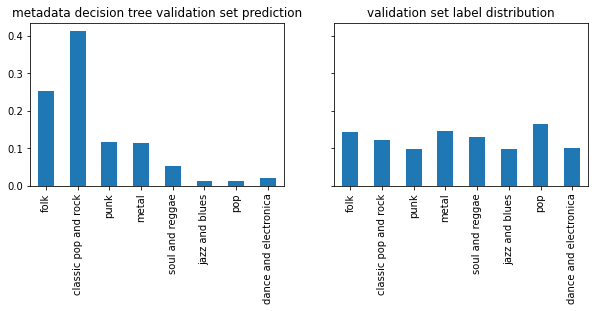

In [277]:
valid_metadata = select_df1_columns_based_on_df2(valid_features, train_metadata)
dt = DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_STATE)
dt.set_params(max_depth=9)
dt.fit(train_metadata, train_labels.values.ravel())
pred = dt.predict(valid_metadata)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_metadata.index), 
                                    valid_labels,
                                    title1="metadata decision tree validation set prediction")

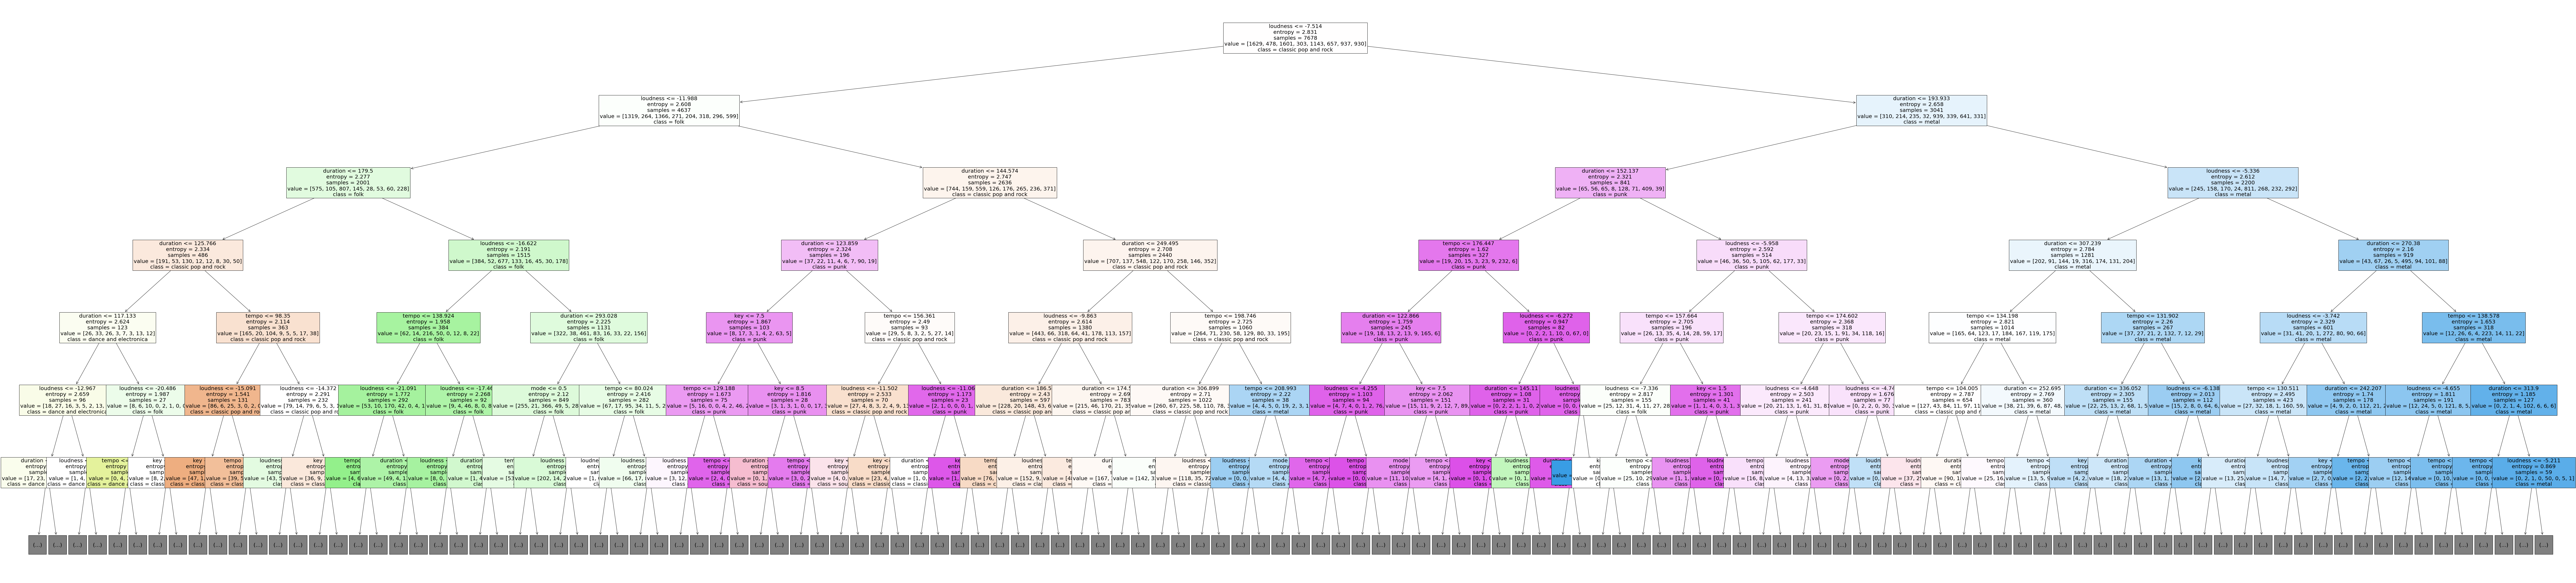

In [63]:
fig = plt.figure(figsize=(170,40))
_ = tree.plot_tree(decision_tree=dt, 
                   feature_names=train_metadata.columns,  
                   class_names=np.unique(train_labels),
                   filled=True,
                   max_depth=6,
                  fontsize=20)

## Decision tree for metadata and audio features

In [279]:
train_dt = train_continuous_meta_audio
valid_dt = select_df1_columns_based_on_df2(one_hot_encoding(valid_features, "key"), 
                                                            train_continuous_meta_audio)

dt = DecisionTreeClassifier(criterion="entropy",
                            random_state=RANDOM_STATE)

dt_f1s = []
ds = [i for i in range(1, 50)]
for d in ds:
    dt.set_params(max_depth=d)

    dt.fit(train_dt, train_labels.values.ravel())
    pred = dt.predict(valid_dt)
    
    _, _, pref = evaluate(pred, valid_labels)
    dt_f1s.append(pref[2])
    
    print(d, pref[2])

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 0.11209563612679116


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 0.19070754086677655


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3 0.2579623505807951


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 0.27329471569794095


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 0.2815541156531004
6 0.36784364932024194
7 0.3576701284450404
8 0.3832676014742715
9 0.37796064612252084
10 0.37599984617222854
11 0.3876714307392737
12 0.37789025011901123
13 0.36777813629755307
14 0.3707157282826885
15 0.36636407830032314
16 0.35683074575747165
17 0.3524065141175384
18 0.34704343129221205
19 0.35941551626853774
20 0.3598895522874307
21 0.3598895522874307
22 0.3598895522874307
23 0.3598895522874307
24 0.3598895522874307
25 0.3598895522874307
26 0.3598895522874307
27 0.3598895522874307
28 0.3598895522874307
29 0.3598895522874307
30 0.3598895522874307
31 0.3598895522874307
32 0.3598895522874307
33 0.3598895522874307
34 0.3598895522874307
35 0.3598895522874307
36 0.3598895522874307
37 0.3598895522874307
38 0.3598895522874307
39 0.3598895522874307
40 0.3598895522874307
41 0.3598895522874307
42 0.3598895522874307
43 0.3598895522874307
44 0.3598895522874307
45 0.3598895522874307
46 0.3598895522874307
47 0.3598895522874307
48 0.3598895522874307
49 0.3598895522874307


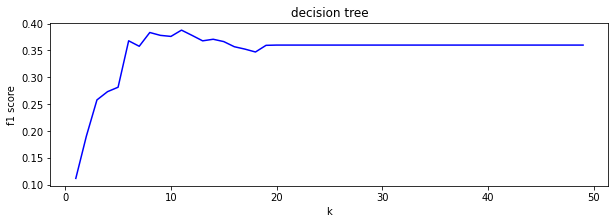

max_depth maximize f1-score : 11 with 0.3876714307392737


In [280]:
draw_k_line_chart(ds, dt_f1s, "f1 score", "decision tree")
dt_best_max_depth = ds[np.argmax(dt_f1s)]
print("max_depth maximize f1-score :", dt_best_max_depth, "with", dt_f1s[np.argmax(dt_f1s)])

                       precision    recall  f1-score   support

      soul and reggae       0.21      0.42      0.28        55
 classic pop and rock       0.27      0.13      0.18        45
                metal       0.29      0.47      0.36        64
                 folk       0.43      0.20      0.28        44
                  pop       0.76      0.59      0.67        66
dance and electronica       0.48      0.31      0.38        74
       jazz and blues       0.43      0.50      0.46        44
                 punk       0.55      0.45      0.50        58

             accuracy                           0.40       450
            macro avg       0.43      0.38      0.39       450
         weighted avg       0.44      0.40      0.40       450



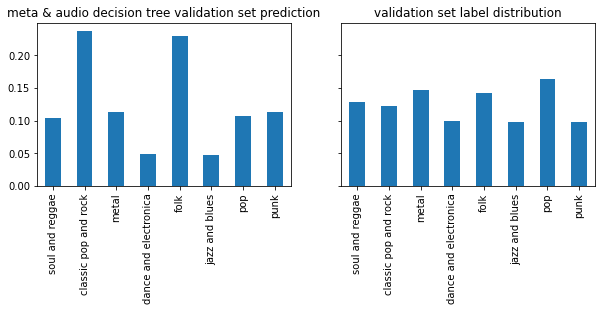

In [281]:
dt.set_params(max_depth=dt_best_max_depth)
dt.fit(train_dt, train_labels.values.ravel())
pred = dt.predict(valid_dt)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_dt.index), 
                                    valid_labels,
                                    title1="meta & audio decision tree validation set prediction")

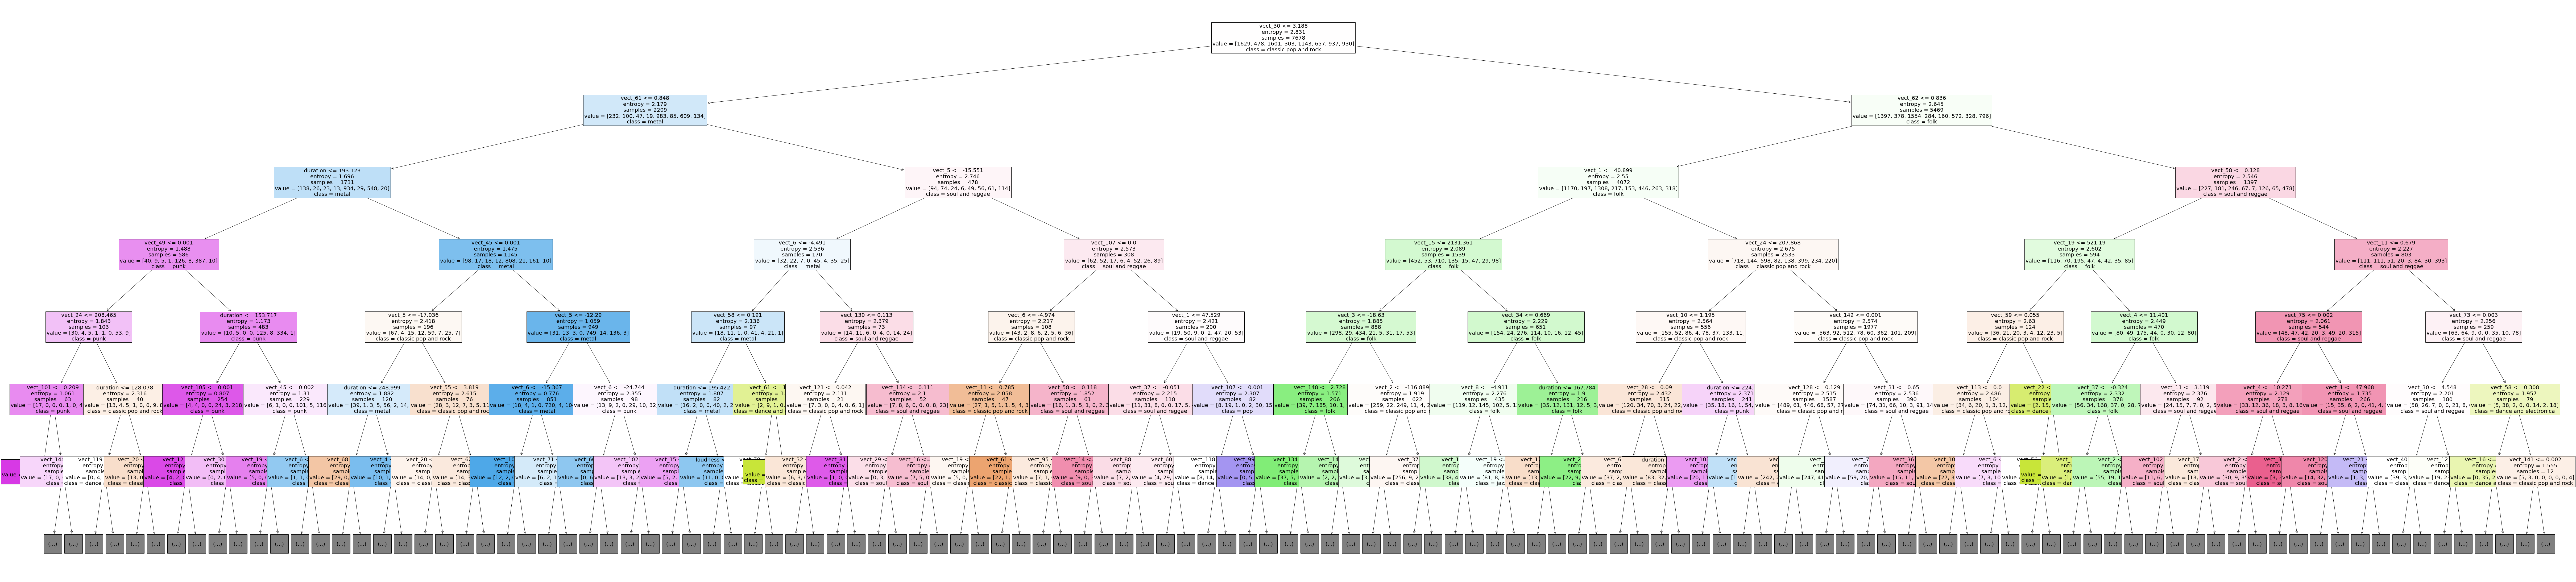

In [133]:
fig = plt.figure(figsize=(170,40))
_ = tree.plot_tree(decision_tree=dt, 
                   feature_names=train_dt.columns,  
                   class_names=np.unique(train_labels),
                   filled=True,
                   max_depth=6,
                  fontsize=20)

## Gaussian naive bayes for random forest metadata and audio features

In [285]:
train_rf = train_continuous_meta_audio
valid_rf = select_df1_columns_based_on_df2(one_hot_encoding(valid_features, "key"), 
                                                            train_continuous_meta_audio)

In [286]:
n_class = len(np.unique(valid_labels["genre"]))
prior = [1 / n_class for _ in range(0, n_class)]

clf = GaussianNB(priors=prior)
clf.fit(train_rf, train_labels.values.ravel())

GaussianNB(priors=[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

                       precision    recall  f1-score   support

      soul and reggae       0.39      0.38      0.39        55
 classic pop and rock       0.52      0.24      0.33        45
                metal       0.32      0.30      0.31        64
                 folk       0.36      0.43      0.39        44
                  pop       0.78      0.82      0.80        66
dance and electronica       0.42      0.58      0.49        74
       jazz and blues       0.59      0.43      0.50        44
                 punk       0.69      0.69      0.69        58

             accuracy                           0.50       450
            macro avg       0.51      0.48      0.49       450
         weighted avg       0.51      0.50      0.50       450



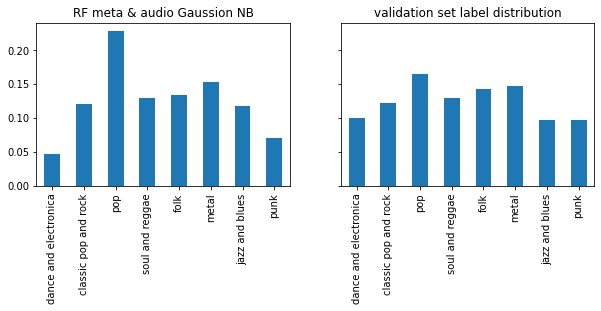

In [287]:
pred = clf.predict(valid_rf)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_rf.index), 
                                    valid_labels,
                                    title1="RF meta & audio Gaussion NB")

## K-NN for random forest selected metadata and audio feature

In [295]:
# k_max = train_audio_normalized_low_corr_chi_selected.shape[0] - 1 # all

def select_best_k(X_train: pd.DataFrame, Y_train: pd.DataFrame, X_valid: pd.DataFrame, Y_valid: pd.DataFrame, k_max=500):
    ks = []
    f1s = [[], []]

    for k in range(1, k_max):
        models = [KNeighborsClassifier(n_neighbors=k, weights="distance", metric='euclidean'), 
                  KNeighborsClassifier(n_neighbors=k, weights="distance", metric='manhattan')]
        trained_models = train(models, train_random_forest_selected, train_labels)
        model_preds = predict(trained_models, valid_random_forest_selected)
        for i, preds in enumerate(model_preds):
            _, _, pref = evaluate(preds, valid_labels)
            f1s[i].append(pref[2])
        ks.append(k)

        print(k, k_max)
    return ks, f1s

In [296]:
ks, f1s = select_best_k(train_random_forest_selected, 
                        train_labels, 
                        valid_random_forest_selected,
                        valid_labels, 
                        k_max=200)

1 200
2 200
3 200
4 200
5 200
6 200
7 200
8 200
9 200
10 200
11 200
12 200
13 200
14 200
15 200
16 200
17 200
18 200
19 200
20 200
21 200
22 200
23 200
24 200
25 200
26 200
27 200
28 200
29 200
30 200
31 200
32 200
33 200
34 200
35 200
36 200
37 200
38 200
39 200
40 200
41 200
42 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


43 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


45 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


46 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47 200
48 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49 200
50 200
51 200
52 200
53 200
54 200
55 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


56 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


57 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58 200
59 200
60 200
61 200
62 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


64 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


65 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66 200
67 200
68 200
69 200
70 200
71 200
72 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


73 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


74 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


76 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


77 200
78 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


82 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


83 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


84 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


85 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


87 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


88 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


91 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


92 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


93 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


95 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


96 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


97 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


99 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


102 200
103 200
104 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


105 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


106 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


107 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


108 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


109 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


110 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


111 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


112 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


113 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


114 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


115 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


116 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


119 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


120 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


121 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


123 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


124 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


125 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


126 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


127 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


128 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


129 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


130 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


131 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


132 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


133 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


135 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


136 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


137 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


138 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


139 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


140 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


141 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


142 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


143 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


144 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


145 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


146 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


147 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


148 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


149 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


150 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


151 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


152 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


154 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


156 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


158 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


159 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


160 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


161 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


162 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


163 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


164 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


165 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


166 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


167 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


168 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


169 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


170 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


172 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


173 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


174 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


175 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


176 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


177 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


178 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


179 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


180 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


181 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


182 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


183 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


184 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


185 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


186 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


187 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


188 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


189 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


190 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


191 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


192 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


193 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


194 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


195 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


196 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


197 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


198 200
199 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [297]:
def draw_k_line_chart(x, y, ylabel, title):
    plt.figure(figsize=(10, 3))
    plt.plot(x, y, 'b-')
    plt.xlabel("k")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

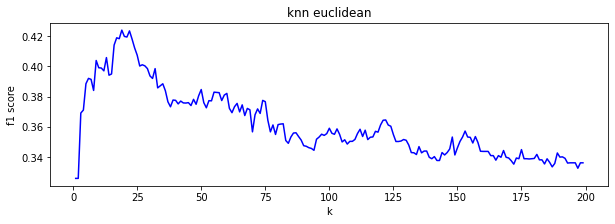

k maximize f1-score : 19 with 0.4239654879765114


In [298]:
draw_k_line_chart(ks, f1s[0], "f1 score", "knn euclidean")
knn_euclidean_k = ks[np.argmax(f1s[0])]
print("k maximize f1-score :", knn_euclidean_k, "with", f1s[0][np.argmax(f1s[0])])

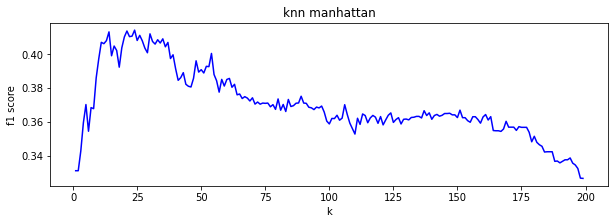

k maximize f1-score : 24 with 0.41413950523861853


In [299]:
draw_k_line_chart(ks, f1s[1], "f1 score", "knn manhattan")
knn_manhattan_k = ks[np.argmax(f1s[1])]
print("k maximize f1-score :", knn_manhattan_k, "with", f1s[1][np.argmax(f1s[1])])

In [300]:
trained_knn = KNeighborsClassifier(n_neighbors=knn_manhattan_k, weights="distance", metric='manhattan')
trained_knn.fit(train_random_forest_selected, train_labels.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')

                       precision    recall  f1-score   support

      soul and reggae       0.25      0.27      0.26        55
 classic pop and rock       0.62      0.22      0.33        45
                metal       0.25      0.70      0.37        64
                 folk       0.46      0.14      0.21        44
                  pop       0.77      0.85      0.81        66
dance and electronica       0.56      0.12      0.20        74
       jazz and blues       0.61      0.39      0.47        44
                 punk       0.66      0.69      0.67        58

             accuracy                           0.44       450
            macro avg       0.52      0.42      0.41       450
         weighted avg       0.52      0.44      0.42       450



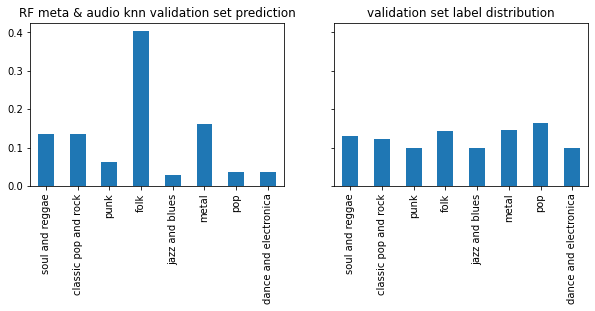

In [301]:
preds = trained_knn.predict(valid_random_forest_selected)
# CM, _, prefs = evaluate(preds, valid_labels, average=None)
print(classification_report(valid_labels, preds, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(preds, columns=valid_labels.columns, index=valid_random_forest_selected.index), 
                                    valid_labels,
                                    title1="RF meta & audio knn validation set prediction")

## K-NN for all metadata and audio features

In [303]:
valid_meta = one_hot_encoding(valid_metadata, "key")
valid_continuous_meta_audio = pd.concat([valid_meta, valid_audio], axis=1)
train_meta_audio = train_continuous_meta_audio
valid_meta_audio = transform_continuous_0_1(valid_continuous_meta_audio)
valid_meta_audio = select_df1_columns_based_on_df2(valid_meta_audio, train_meta_audio)

In [304]:
ks, f1s, = select_best_k(train_meta_audio, 
                        train_labels, 
                        valid_meta_audio, 
                        valid_labels, 
                        k_max=200)

1 200
2 200
3 200
4 200
5 200
6 200
7 200
8 200
9 200
10 200
11 200
12 200
13 200
14 200
15 200
16 200
17 200
18 200
19 200
20 200
21 200
22 200
23 200
24 200
25 200
26 200
27 200
28 200
29 200
30 200
31 200
32 200
33 200
34 200
35 200
36 200
37 200
38 200
39 200
40 200
41 200
42 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


43 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


45 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


46 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47 200
48 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49 200
50 200
51 200
52 200
53 200
54 200
55 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


56 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


57 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58 200
59 200
60 200
61 200
62 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


64 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


65 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66 200
67 200
68 200
69 200
70 200
71 200
72 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


73 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


74 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


76 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


77 200
78 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


82 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


83 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


84 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


85 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


87 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


88 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


91 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


92 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


93 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


95 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


96 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


97 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


99 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


102 200
103 200
104 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


105 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


106 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


107 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


108 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


109 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


110 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


111 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


112 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


113 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


114 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


115 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


116 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


119 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


120 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


121 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


123 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


124 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


125 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


126 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


127 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


128 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


129 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


130 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


131 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


132 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


133 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


135 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


136 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


137 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


138 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


139 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


140 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


141 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


142 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


143 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


144 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


145 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


146 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


147 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


148 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


149 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


150 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


151 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


152 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


154 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


156 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


158 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


159 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


160 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


161 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


162 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


163 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


164 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


165 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


166 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


167 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


168 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


169 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


170 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


172 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


173 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


174 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


175 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


176 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


177 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


178 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


179 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


180 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


181 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


182 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


183 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


184 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


185 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


186 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


187 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


188 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


189 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


190 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


191 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


192 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


193 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


194 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


195 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


196 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


197 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


198 200
199 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


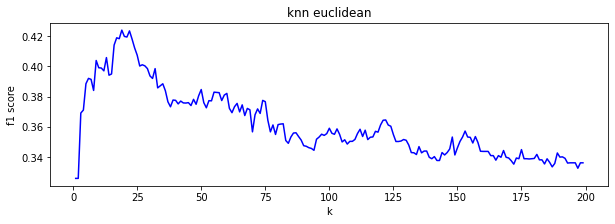

k maximize f1-score : 19 with 0.4239654879765114


In [305]:
draw_k_line_chart(ks, f1s[0], "f1 score", "knn euclidean")
knn_euclidean_k = ks[np.argmax(f1s[0])]
print("k maximize f1-score :", knn_euclidean_k, "with", f1s[0][np.argmax(f1s[0])])

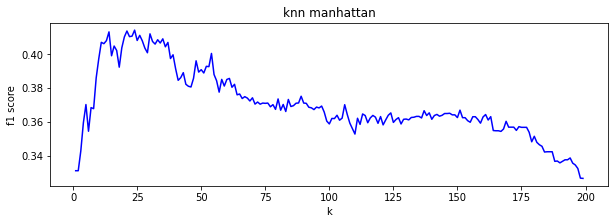

k maximize f1-score : 24 with 0.41413950523861853


In [306]:
draw_k_line_chart(ks, f1s[1], "f1 score", "knn manhattan")
knn_manhattan_k = ks[np.argmax(f1s[1])]
print("k maximize f1-score :", knn_manhattan_k, "with", f1s[1][np.argmax(f1s[1])])

In [307]:
trained_knn = KNeighborsClassifier(n_neighbors=knn_manhattan_k, weights="distance", metric='manhattan')
trained_knn.fit(train_random_forest_selected, train_labels.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')

                       precision    recall  f1-score   support

      soul and reggae       0.25      0.27      0.26        55
 classic pop and rock       0.62      0.22      0.33        45
                metal       0.25      0.70      0.37        64
                 folk       0.46      0.14      0.21        44
                  pop       0.77      0.85      0.81        66
dance and electronica       0.56      0.12      0.20        74
       jazz and blues       0.61      0.39      0.47        44
                 punk       0.66      0.69      0.67        58

             accuracy                           0.44       450
            macro avg       0.52      0.42      0.41       450
         weighted avg       0.52      0.44      0.42       450



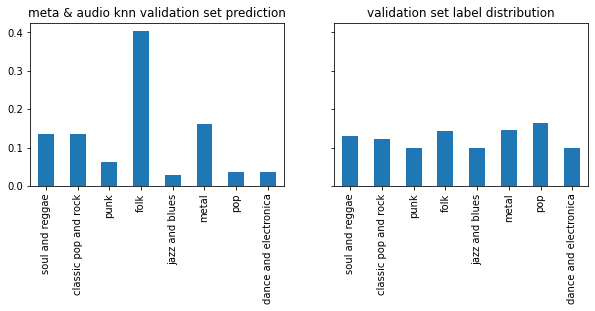

In [308]:
preds = trained_knn.predict(valid_random_forest_selected)
print(classification_report(valid_labels, preds, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(preds, columns=valid_labels.columns, index=valid_random_forest_selected.index), 
                                    valid_labels,
                                    title1="meta & audio knn validation set prediction")

## K-NN for tags, metadata and audio features

In [309]:
ks, f1s, = select_best_k(train_all, 
                        train_labels, 
                        valid_all, 
                        valid_labels, 
                        k_max=200)

1 200
2 200
3 200
4 200
5 200
6 200
7 200
8 200
9 200
10 200
11 200
12 200
13 200
14 200
15 200
16 200
17 200
18 200
19 200
20 200
21 200
22 200
23 200
24 200
25 200
26 200
27 200
28 200
29 200
30 200
31 200
32 200
33 200
34 200
35 200
36 200
37 200
38 200
39 200
40 200
41 200
42 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


43 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


45 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


46 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47 200
48 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49 200
50 200
51 200
52 200
53 200
54 200
55 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


56 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


57 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58 200
59 200
60 200
61 200
62 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


64 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


65 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


66 200
67 200
68 200
69 200
70 200
71 200
72 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


73 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


74 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


76 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


77 200
78 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


82 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


83 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


84 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


85 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


87 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


88 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


91 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


92 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


93 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


95 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


96 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


97 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


99 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


102 200
103 200
104 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


105 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


106 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


107 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


108 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


109 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


110 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


111 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


112 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


113 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


114 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


115 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


116 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


119 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


120 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


121 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


123 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


124 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


125 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


126 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


127 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


128 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


129 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


130 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


131 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


132 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


133 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


135 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


136 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


137 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


138 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


139 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


140 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


141 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


142 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


143 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


144 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


145 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


146 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


147 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


148 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


149 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


150 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


151 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


152 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


154 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


156 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


158 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


159 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


160 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


161 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


162 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


163 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


164 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


165 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


166 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


167 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


168 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


169 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


170 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


172 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


173 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


174 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


175 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


176 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


177 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


178 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


179 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


180 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


181 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


182 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


183 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


184 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


185 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


186 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


187 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


188 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


189 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


190 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


191 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


192 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


193 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


194 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


195 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


196 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


197 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


198 200
199 200


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


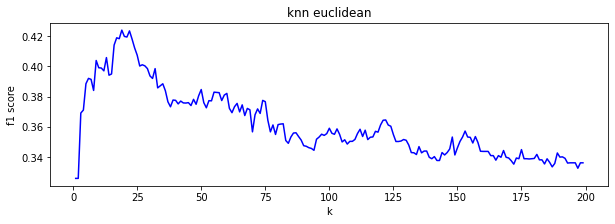

k maximize f1-score : 19 with 0.4239654879765114


In [310]:
draw_k_line_chart(ks, f1s[0], "f1 score", "knn euclidean")
knn_euclidean_k = ks[np.argmax(f1s[0])]
print("k maximize f1-score :", knn_euclidean_k, "with", f1s[0][np.argmax(f1s[0])])

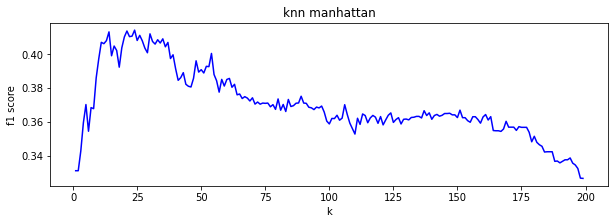

k maximize f1-score : 24 with 0.41413950523861853


In [311]:
draw_k_line_chart(ks, f1s[1], "f1 score", "knn manhattan")
knn_manhattan_k = ks[np.argmax(f1s[1])]
print("k maximize f1-score :", knn_manhattan_k, "with", f1s[1][np.argmax(f1s[1])])

In [312]:
trained_knn = KNeighborsClassifier(n_neighbors=knn_manhattan_k, weights="distance", metric='manhattan')
trained_knn.fit(train_all, train_labels.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')

                       precision    recall  f1-score   support

      soul and reggae       0.23      0.47      0.31        55
 classic pop and rock       0.33      0.02      0.04        45
                metal       0.28      0.69      0.40        64
                 folk       0.60      0.14      0.22        44
                  pop       0.72      0.62      0.67        66
dance and electronica       0.38      0.08      0.13        74
       jazz and blues       0.52      0.36      0.43        44
                 punk       0.48      0.52      0.50        58

             accuracy                           0.38       450
            macro avg       0.44      0.36      0.34       450
         weighted avg       0.44      0.38      0.35       450



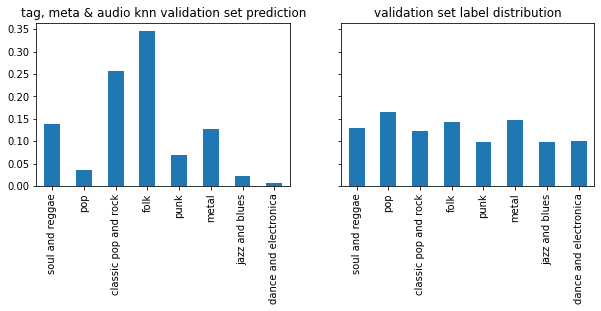

In [313]:
preds = trained_knn.predict(valid_all)
print(classification_report(valid_labels, preds, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(preds, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="tag, meta & audio knn validation set prediction")

## Random forest selected features

In [314]:
train_rf = select_df1_columns_based_on_df2(train_features, train_random_forest_selected)
valid_rf = select_df1_columns_based_on_df2(valid_features, train_rf)

In [315]:
rf = RandomForestClassifier(n_estimators = 1000, 
                         random_state=RANDOM_STATE, 
                         criterion="entropy",
                         )
rf.fit(train_rf, train_labels.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=1000,
                       random_state=854035)

                       precision    recall  f1-score   support

      soul and reggae       0.25      0.49      0.33        55
 classic pop and rock       1.00      0.18      0.30        45
                metal       0.27      0.61      0.37        64
                 folk       1.00      0.05      0.09        44
                  pop       0.88      0.53      0.66        66
dance and electronica       0.81      0.18      0.29        74
       jazz and blues       0.41      0.59      0.49        44
                 punk       0.68      0.78      0.73        58

             accuracy                           0.43       450
            macro avg       0.66      0.42      0.41       450
         weighted avg       0.66      0.43      0.42       450



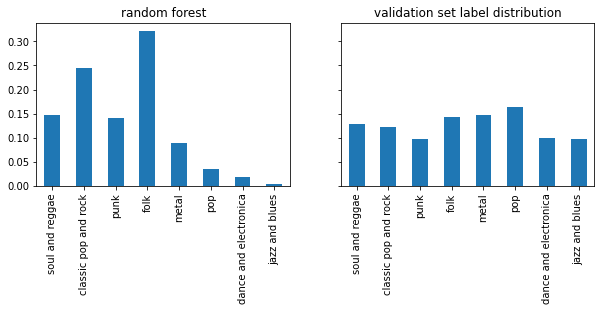

In [316]:
pred = rf.predict(valid_rf)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_random_forest_selected.index), 
                                    valid_labels,
                                    title1="random forest")

## Random forest selected features with max depth 10

In [317]:
train_rf = select_df1_columns_based_on_df2(train_features, train_random_forest_selected)
valid_rf = select_df1_columns_based_on_df2(valid_features, train_rf)

In [318]:
rf = RandomForestClassifier(n_estimators = 1000, 
                         random_state=RANDOM_STATE, 
                         criterion="entropy",
                         max_depth=10)
rf.fit(train_rf, train_labels.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000,
                       random_state=854035)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

      soul and reggae       0.22      0.40      0.28        55
 classic pop and rock       1.00      0.18      0.30        45
                metal       0.25      0.62      0.36        64
                 folk       0.00      0.00      0.00        44
                  pop       0.88      0.53      0.66        66
dance and electronica       0.83      0.14      0.23        74
       jazz and blues       0.40      0.57      0.47        44
                 punk       0.66      0.78      0.71        58

             accuracy                           0.41       450
            macro avg       0.53      0.40      0.38       450
         weighted avg       0.55      0.41      0.39       450



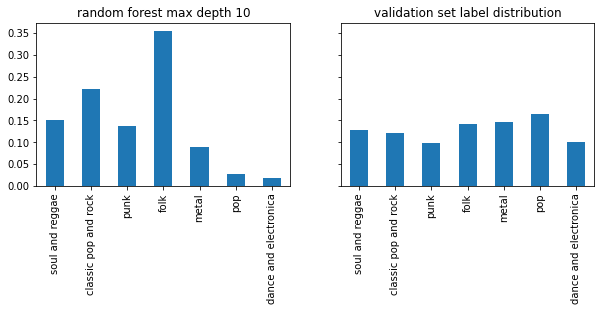

In [319]:
pred = rf.predict(valid_rf)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_random_forest_selected.index), 
                                    valid_labels,
                                    title1="random forest max depth 10")

## Random forest selected features with n_estimators 1000 and max depth 10

In [320]:
train_rf = train_continuous_meta_audio
valid_rf = select_df1_columns_based_on_df2(one_hot_encoding(valid_features, "key"), 
                                                            train_continuous_meta_audio)

In [321]:
rf = RandomForestClassifier(n_estimators = 1000, 
                         random_state=RANDOM_STATE, 
                         criterion="entropy",
                         max_depth=10)
rf.fit(train_rf, train_labels.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000,
                       random_state=854035)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

      soul and reggae       0.21      0.35      0.26        55
 classic pop and rock       1.00      0.18      0.30        45
                metal       0.23      0.66      0.34        64
                 folk       0.00      0.00      0.00        44
                  pop       0.88      0.68      0.77        66
dance and electronica       0.78      0.09      0.17        74
       jazz and blues       0.46      0.50      0.48        44
                 punk       0.73      0.78      0.75        58

             accuracy                           0.42       450
            macro avg       0.54      0.40      0.38       450
         weighted avg       0.55      0.42      0.39       450



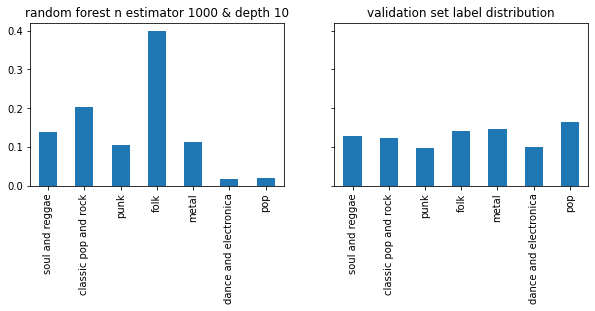

In [322]:
pred = rf.predict(valid_rf)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_random_forest_selected.index), 
                                    valid_labels,
                                    title1="random forest n estimator 1000 & depth 10")

## Linear SVC for metadata and audio features

In [329]:
train_svc = train_continuous_meta_audio
valid_svc = select_df1_columns_based_on_df2(one_hot_encoding(valid_features, "key"), train_svc)

svc = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=RANDOM_STATE, 
                              tol=1e-5,
                              max_iter=1000))
svc.fit(train_svc, train_labels.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=854035, tol=1e-05))])

                       precision    recall  f1-score   support

      soul and reggae       0.28      0.67      0.40        55
 classic pop and rock       0.58      0.24      0.34        45
                metal       0.38      0.64      0.48        64
                 folk       0.67      0.18      0.29        44
                  pop       0.82      0.74      0.78        66
dance and electronica       0.55      0.15      0.23        74
       jazz and blues       0.49      0.61      0.55        44
                 punk       0.80      0.62      0.70        58

             accuracy                           0.49       450
            macro avg       0.57      0.48      0.47       450
         weighted avg       0.57      0.49      0.47       450



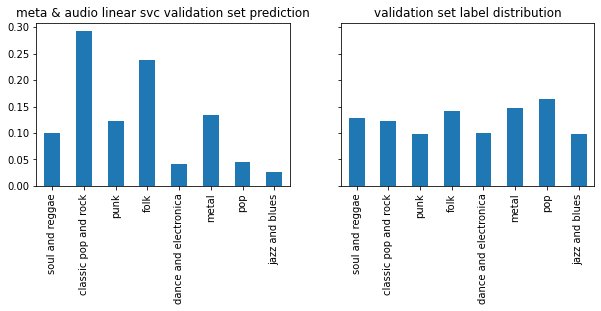

In [330]:
pred = svc.predict(valid_svc)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_svc.index), 
                                    valid_labels,
                                    title1="meta & audio linear svc validation set prediction")

## SVC for metadata and audio features

In [331]:
train_svc = train_continuous_meta_audio
valid_svc = select_df1_columns_based_on_df2(one_hot_encoding(valid_features, "key"), train_svc)

svc = make_pipeline(StandardScaler(),
                    SVC(random_state=RANDOM_STATE, 
                        tol=1e-5,
                        max_iter=1000
                        #,kernel="poly"
                       ))
svc.fit(train_svc, train_labels.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(max_iter=1000, random_state=854035, tol=1e-05))])

                       precision    recall  f1-score   support

      soul and reggae       0.27      0.69      0.39        55
 classic pop and rock       0.74      0.31      0.44        45
                metal       0.38      0.64      0.48        64
                 folk       1.00      0.27      0.43        44
                  pop       0.92      0.55      0.69        66
dance and electronica       0.81      0.23      0.36        74
       jazz and blues       0.43      0.52      0.47        44
                 punk       0.79      0.76      0.77        58

             accuracy                           0.50       450
            macro avg       0.67      0.50      0.50       450
         weighted avg       0.67      0.50      0.51       450



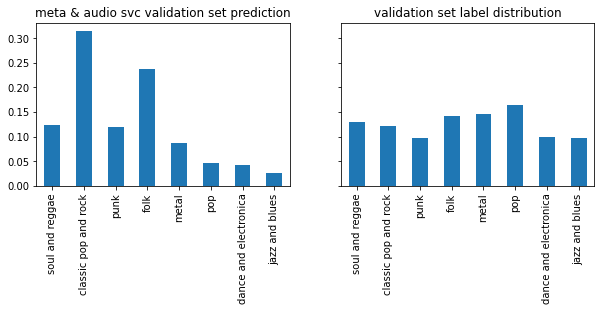

In [332]:
pred = svc.predict(valid_svc)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_svc.index), 
                                    valid_labels,
                                    title1="meta & audio svc validation set prediction")

## Decision Tree for tag, metadata and audio features

In [282]:
train_dt = train_all
valid_dt = valid_all

dt = DecisionTreeClassifier(criterion="entropy",
                            random_state=RANDOM_STATE,
                            max_depth=2000)

dt_f1s = []
ds = [i for i in range(1, 65)]
for d in ds:
    dt.set_params(max_depth=d)

    dt.fit(train_dt, train_labels.values.ravel())
    pred = dt.predict(valid_dt)
    
    _, _, pref = evaluate(pred, valid_labels)
    dt_f1s.append(pref[2])
    
    print(d, pref[2])

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 0.11209563612679116


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 0.26173952627224756


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3 0.3801450182937893


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 0.3887827974575011


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 0.37920566182205206


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6 0.401425573590666
7 0.4209319150841492
8 0.4415510448687675
9 0.4411106056824185
10 0.4548904548414382
11 0.43888845617990635
12 0.4473688898855431
13 0.44155053555619767
14 0.44904890467173775
15 0.4375529057124598
16 0.4336618212633531
17 0.4254503735972367
18 0.43332956990682275
19 0.43088935120837546
20 0.42731262775186074
21 0.4348784582772892
22 0.4364504562347023
23 0.4364504562347023
24 0.4364504562347023
25 0.4364504562347023
26 0.4364504562347023
27 0.4364504562347023
28 0.4364504562347023
29 0.4364504562347023
30 0.4364504562347023
31 0.4364504562347023
32 0.4364504562347023
33 0.4364504562347023
34 0.4364504562347023
35 0.4364504562347023
36 0.4364504562347023
37 0.4364504562347023
38 0.4364504562347023
39 0.4364504562347023
40 0.4364504562347023
41 0.4364504562347023
42 0.4364504562347023
43 0.4364504562347023
44 0.4364504562347023
45 0.4364504562347023
46 0.4364504562347023
47 0.4364504562347023
48 0.4364504562347023
49 0.4364504562347023
50 0.4364504562347023
51 0.4364

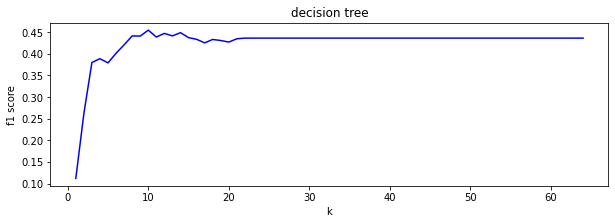

max_depth maximize f1-score : 10 with 0.4548904548414382


In [283]:
draw_k_line_chart(ds, dt_f1s, "f1 score", "decision tree")
dt_best_max_depth = ds[np.argmax(dt_f1s)]
print("max_depth maximize f1-score :", dt_best_max_depth, "with", dt_f1s[np.argmax(dt_f1s)])

                       precision    recall  f1-score   support

      soul and reggae       0.23      0.35      0.27        55
 classic pop and rock       0.58      0.24      0.34        45
                metal       0.31      0.47      0.37        64
                 folk       0.40      0.14      0.20        44
                  pop       0.78      0.61      0.68        66
dance and electronica       0.84      0.65      0.73        74
       jazz and blues       0.47      0.77      0.58        44
                 punk       0.47      0.43      0.45        58

             accuracy                           0.47       450
            macro avg       0.51      0.46      0.45       450
         weighted avg       0.53      0.47      0.48       450



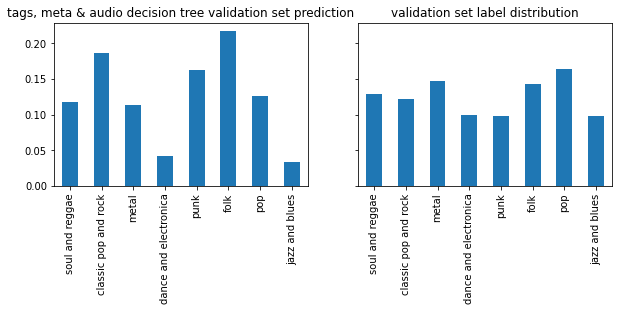

In [284]:
dt.set_params(max_depth=dt_best_max_depth)
dt.fit(train_dt, train_labels.values.ravel())
pred = dt.predict(valid_dt)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_dt.index), 
                                    valid_labels,
                                    title1="tags, meta & audio decision tree validation set prediction")

## Gaussian naive bayes for tag features

In [288]:
n_class = len(np.unique(valid_labels["genre"]))
prior = [1 / n_class for _ in range(0, n_class)]

clf = GaussianNB(priors=prior)
clf.fit(train_tag, train_labels.values.ravel())

GaussianNB(priors=[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

                       precision    recall  f1-score   support

      soul and reggae       0.13      0.15      0.14        55
 classic pop and rock       0.13      0.13      0.13        45
                metal       0.35      0.11      0.17        64
                 folk       0.13      0.16      0.14        44
                  pop       0.43      0.58      0.49        66
dance and electronica       0.89      0.97      0.93        74
       jazz and blues       0.76      0.64      0.69        44
                 punk       0.31      0.33      0.32        58

             accuracy                           0.41       450
            macro avg       0.39      0.38      0.38       450
         weighted avg       0.41      0.41      0.40       450



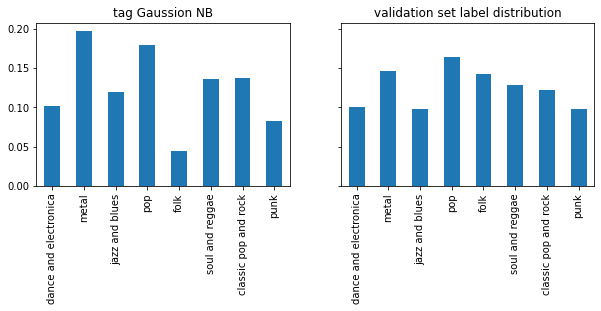

In [289]:
pred = clf.predict(valid_tag)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_rf.index), 
                                    valid_labels,
                                    title1="tag Gaussion NB")

## Gaussian naive bayes for tag, metadata and audio features

In [290]:
clf = GaussianNB()
clf.fit(train_all, train_labels.values.ravel())

GaussianNB()

                       precision    recall  f1-score   support

      soul and reggae       0.31      0.49      0.38        55
 classic pop and rock       0.64      0.20      0.31        45
                metal       0.68      0.23      0.35        64
                 folk       0.43      0.66      0.52        44
                  pop       0.84      0.85      0.84        66
dance and electronica       0.78      1.00      0.88        74
       jazz and blues       0.89      0.39      0.54        44
                 punk       0.65      0.88      0.75        58

             accuracy                           0.62       450
            macro avg       0.65      0.59      0.57       450
         weighted avg       0.66      0.62      0.59       450



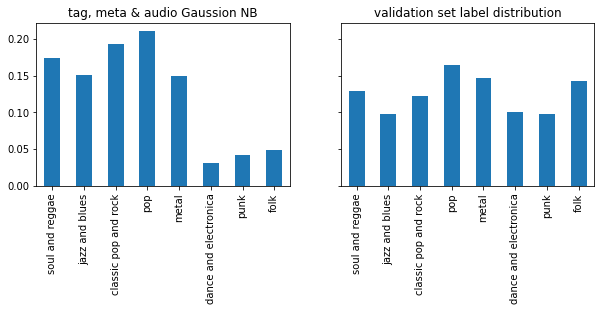

In [291]:
pred = clf.predict(valid_all)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="tag, meta & audio Gaussion NB")

## Gaussian naive bayes for title, tag, metadata and audio features

In [292]:
clf = GaussianNB()
clf.fit(train_all_title, train_labels.values.ravel())

GaussianNB()

                       precision    recall  f1-score   support

      soul and reggae       0.17      0.07      0.10        55
 classic pop and rock       0.08      0.07      0.07        45
                metal       0.61      0.17      0.27        64
                 folk       0.16      0.68      0.26        44
                  pop       0.87      0.41      0.56        66
dance and electronica       0.78      0.99      0.87        74
       jazz and blues       0.92      0.27      0.42        44
                 punk       0.48      0.38      0.42        58

             accuracy                           0.40       450
            macro avg       0.51      0.38      0.37       450
         weighted avg       0.54      0.40      0.40       450



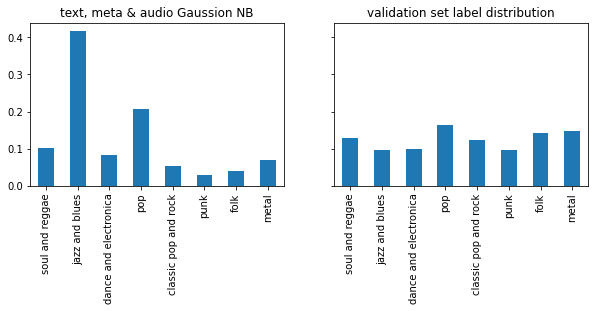

In [293]:
pred = clf.predict(valid_all_title)
_, _, pref = evaluate(pred, valid_labels)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))

draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all_title.index), 
                                    valid_labels,
                                    title1="text, meta & audio Gaussion NB")

## Random forest with n_estimator 1000 and depth 10 for tag, metadata and audio features

In [323]:
rf = RandomForestClassifier(n_estimators = 1000,random_state=RANDOM_STATE, criterion="entropy", max_depth=10)
rf.fit(train_all, train_labels.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000,
                       random_state=854035)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

      soul and reggae       0.41      0.53      0.46        55
 classic pop and rock       1.00      0.07      0.12        45
                metal       0.31      0.73      0.44        64
                 folk       0.00      0.00      0.00        44
                  pop       0.89      0.94      0.91        66
dance and electronica       0.95      0.97      0.96        74
       jazz and blues       0.81      0.66      0.73        44
                 punk       0.80      0.60      0.69        58

             accuracy                           0.62       450
            macro avg       0.64      0.56      0.54       450
         weighted avg       0.66      0.62      0.58       450



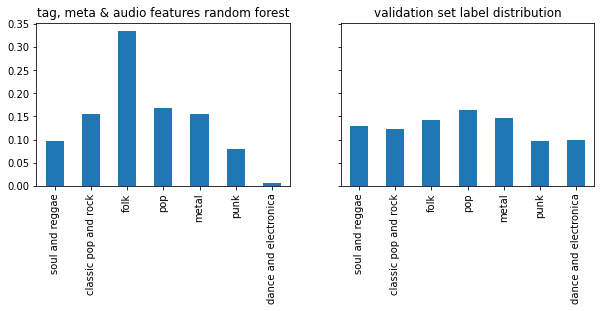

In [328]:
pred = rf.predict(valid_all)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="tag, meta & audio features random forest")

## SVC for tag,  metadata and audio feaatures

In [333]:
svc = make_pipeline(StandardScaler(),
                    SVC(random_state=RANDOM_STATE, 
                        tol=1e-5,
                        max_iter=1000
                       ))
svc.fit(train_all, train_labels.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(max_iter=1000, random_state=854035, tol=1e-05))])

                       precision    recall  f1-score   support

      soul and reggae       0.39      0.65      0.49        55
 classic pop and rock       0.33      0.07      0.11        45
                metal       0.45      0.69      0.55        64
                 folk       1.00      0.02      0.04        44
                  pop       0.92      0.74      0.82        66
dance and electronica       0.94      0.86      0.90        74
       jazz and blues       0.53      0.91      0.67        44
                 punk       0.83      0.76      0.79        58

             accuracy                           0.62       450
            macro avg       0.67      0.59      0.55       450
         weighted avg       0.69      0.62      0.59       450



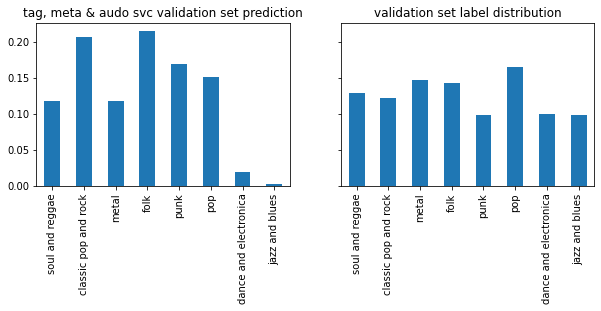

In [334]:
pred = svc.predict(valid_all)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="tag, meta & audo svc validation set prediction")

## Linear SVC for random forest selected tag, meta and audio features

In [336]:
svc = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=RANDOM_STATE, 
                              tol=1e-5,
                              max_iter=1000))
svc.fit(train_all_random_forest_selected, train_labels.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=854035, tol=1e-05))])

                       precision    recall  f1-score   support

      soul and reggae       0.45      0.67      0.54        55
 classic pop and rock       0.43      0.20      0.27        45
                metal       0.47      0.70      0.56        64
                 folk       0.67      0.18      0.29        44
                  pop       0.84      0.71      0.77        66
dance and electronica       0.92      0.93      0.93        74
       jazz and blues       0.55      0.70      0.62        44
                 punk       0.80      0.71      0.75        58

             accuracy                           0.64       450
            macro avg       0.64      0.60      0.59       450
         weighted avg       0.66      0.64      0.62       450



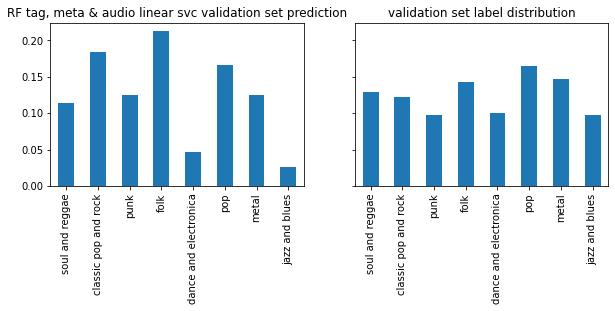

In [337]:
pred = svc.predict(valid_all_random_forest_selected)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all_random_forest_selected.index), 
                                    valid_labels,
                                    title1="RF tag, meta & audio linear svc validation set prediction")

## Linear SVC for all tag, metadata and audio features

In [338]:
svc = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=RANDOM_STATE, 
                              tol=1e-5,
                              max_iter=1000))
svc.fit(train_all, train_labels.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=854035, tol=1e-05))])

                       precision    recall  f1-score   support

      soul and reggae       0.25      0.47      0.33        55
 classic pop and rock       0.15      0.09      0.11        45
                metal       0.48      0.56      0.52        64
                 folk       0.20      0.09      0.13        44
                  pop       0.75      0.45      0.57        66
dance and electronica       0.84      0.91      0.87        74
       jazz and blues       0.55      0.64      0.59        44
                 punk       0.54      0.48      0.51        58

             accuracy                           0.50       450
            macro avg       0.47      0.46      0.45       450
         weighted avg       0.50      0.50      0.49       450



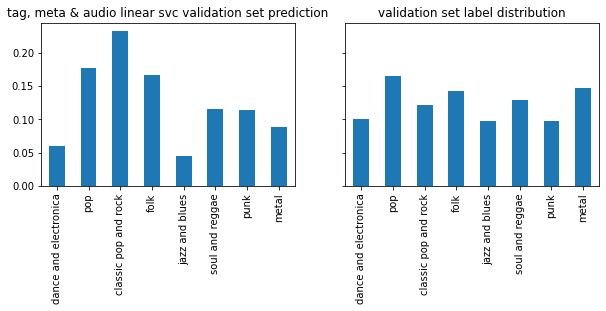

In [339]:
pred = svc.predict(valid_all)
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="tag, meta & audio linear svc validation set prediction")

# Boosting & Bagging

## Boosted gaussian nb with ns 3 for tag, metadata and audio feature

### boosting

In [199]:
def draw_train_valid_score(xs, train_ys, valid_ys, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(10, 3))
    plt.plot(xs, train_ys, 'b-')
    plt.plot(xs, valid_ys, 'r-')
    plt.legend(["train " + ylabel, "valid " + ylabel])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [203]:
gnb_ada_discrete = AdaBoostClassifier(
    GaussianNB(),
    n_estimators=21,
    learning_rate=1,
    algorithm="SAMME",
    random_state=RANDOM_STATE)

ns = []
train_f1s = []
valid_f1s = []
for i in range(1, 42):
    ns.append(i)
    gnb_ada_discrete.set_params(n_estimators=i)
    gnb_ada_discrete.fit(train_all, train_labels.values.ravel())
    
    pred = gnb_ada_discrete.predict(valid_all)
    _, _, pref = evaluate(pred, valid_labels.values.ravel())
    valid_f1s.append(pref[2])
    
    pred = gnb_ada_discrete.predict(train_all)
    _, _, pref = evaluate(pred, train_labels.values.ravel())
    train_f1s.append(pref[2])
    
    print(i, train_f1s[-1], valid_f1s[-1])

1 0.5235758765917979 0.5699485294842342
2 0.5235758765917979 0.5699485294842342
3 0.6112792534294551 0.6274171810631145
4 0.5981330943806382 0.5720818442999921
5 0.6434964268903229 0.6088914451492471
6 0.6232918860282703 0.5870180094454803
7 0.6533017700611297 0.586141205754767
8 0.6755161230716675 0.6012159400406085
9 0.68250203978364 0.6024181810899079
10 0.7264499827796489 0.6099348581487581
11 0.7122465265041764 0.6106823659695721
12 0.7377627229508752 0.6010183746730553
13 0.7218878079903013 0.5964640362739025
14 0.748373209349539 0.6105553392332977
15 0.7323302232931574 0.6082654996959151
16 0.760070988728541 0.5983946540094234
17 0.7417807404907599 0.6030709968057292
18 0.7729993079153785 0.6107321254738531
19 0.7579872765249751 0.6082297060856792
20 0.7646580063401056 0.5957812314361688
21 0.7699965931256343 0.6126737617353932
22 0.7692797621659428 0.594440595660792
23 0.7827932729222358 0.5902423632101123
24 0.7800083965076553 0.5782618584675191
25 0.7875332512591642 0.5830731

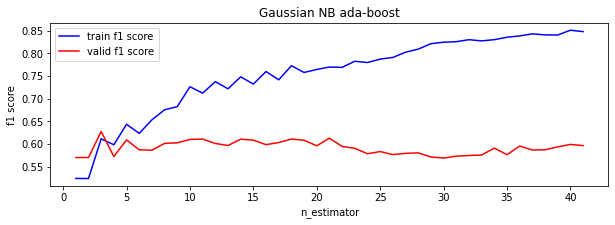

In [204]:
draw_train_valid_score(ns, train_f1s, valid_f1s, 
                       title="Gaussian NB ada-boost",
                       xlabel="n_estimator",
                       ylabel="f1 score"
                      )

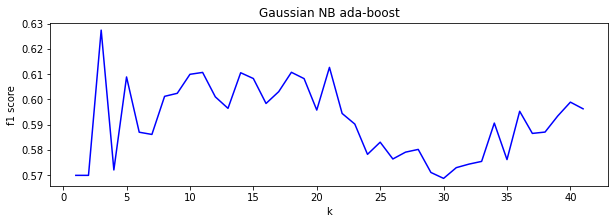

n_estimators maximize f1-score : 3 with 0.6274171810631145


In [205]:
draw_k_line_chart(ns, valid_f1s, "f1 score", "Gaussian NB ada-boost")
gnb_best_n_estimators = ns[np.argmax(valid_f1s)]
print("n_estimators maximize f1-score :", gnb_best_n_estimators, "with", valid_f1s[np.argmax(valid_f1s)])

### training

In [206]:
gnb_ada_discrete.set_params(n_estimators=gnb_best_n_estimators)
gnb_ada_discrete.fit(train_all, train_labels.values.ravel())

AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(),
                   learning_rate=1, n_estimators=3, random_state=854035)

0.6274171810631145
                       precision    recall  f1-score   support

      soul and reggae       0.37      0.42      0.39        55
 classic pop and rock       0.58      0.24      0.34        45
                metal       0.72      0.44      0.54        64
                 folk       0.41      0.66      0.51        44
                  pop       0.83      0.83      0.83        66
dance and electronica       0.91      0.99      0.95        74
       jazz and blues       0.85      0.64      0.73        44
                 punk       0.62      0.86      0.72        58

             accuracy                           0.66       450
            macro avg       0.66      0.63      0.63       450
         weighted avg       0.68      0.66      0.65       450



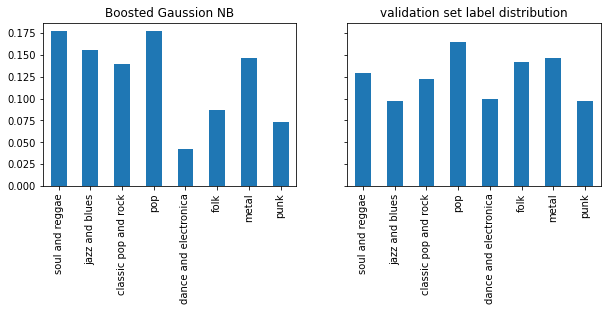

In [207]:
pred = gnb_ada_discrete.predict(valid_all)
_, _, pref = evaluate(pred, valid_labels)
print(pref[2])
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="Boosted Gaussion NB")

## Boosted decision tree with ns 35 and max_depth 10 for tag, meta and audio features

### boosting

In [208]:
dt_ada_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(criterion="entropy",
                            random_state=RANDOM_STATE,
                            max_depth=10),
    n_estimators=21,
    learning_rate=1,
    algorithm="SAMME",
    random_state=RANDOM_STATE)

ns_dt = []
train_dt_f1s = []
valid_dt_f1s = []
for i in range(1, 42):
    ns_dt.append(i)
    dt_ada_discrete.set_params(n_estimators=i)
    dt_ada_discrete.fit(train_all, train_labels.values.ravel())
    
    pred = dt_ada_discrete.predict(valid_all)
    _, _, pref = evaluate(pred, valid_labels.values.ravel())
    valid_dt_f1s.append(pref[2])
    
    pred = dt_ada_discrete.predict(train_all)
    _, _, pref = evaluate(pred, train_labels.values.ravel())
    train_dt_f1s.append(pref[2])
    
    print(i, train_dt_f1s[-1], valid_dt_f1s[-1])

1 0.7401247270992916 0.4581837631896307
2 0.6354154360157812 0.29924921089678114
3 0.7239778416699802 0.3843435875025066
4 0.8390162363487348 0.4582257971826596
5 0.9018298457018772 0.45507591138157705
6 0.9162295356154251 0.47044184510272236
7 0.9404206071061376 0.44996641879716304
8 0.9582041578460901 0.46978426666120465
9 0.9632413028436806 0.44930262636812063
10 0.9808194290267699 0.4738934681259497
11 0.9896308525024541 0.48263754130832104
12 0.9921977266860484 0.48144321078835584
13 0.9939827086331159 0.4850195072173774
14 0.9954048418069745 0.49384780452193533
15 0.9953229424453571 0.5067042585813165
16 0.9977324631734755 0.491858194478067
17 0.9980744075276444 0.4892477690054535
18 0.9985348831712269 0.48716182239092093
19 0.9987822568146514 0.5074004378109678
20 0.999414197552758 0.48690972353705475
21 0.9995355780744539 0.486412884532162
22 0.9997677831384965 0.491559943133765
23 0.9999225952105271 0.4917917821346143
24 0.9997677831384965 0.4952989972507475
25 0.9999225952105

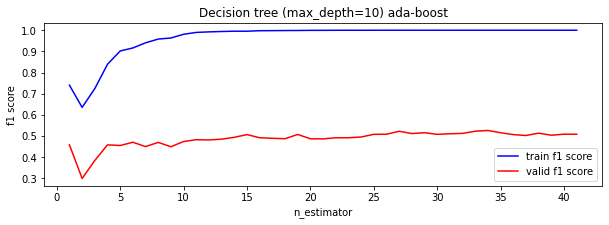

In [209]:
draw_train_valid_score(ns_dt, train_dt_f1s, valid_dt_f1s, 
                       title="Decision tree (max_depth=10) ada-boost",
                       xlabel="n_estimator",
                       ylabel="f1 score"
                      )

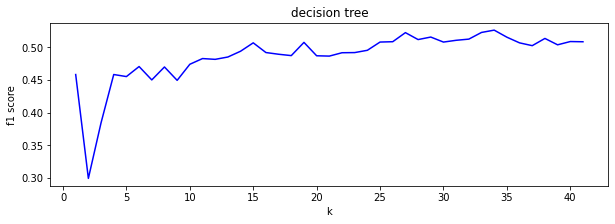

n_estimators maximize f1-score : 34 with 0.5261555691175197


In [210]:
draw_k_line_chart(ns_dt, valid_dt_f1s, "f1 score", "decision tree")
dt_best_n_estimators = ns_dt[np.argmax(valid_dt_f1s)]
print("n_estimators maximize f1-score :", dt_best_n_estimators, "with", valid_dt_f1s[np.argmax(valid_dt_f1s)])

### train valid

In [222]:
dt_ada_discrete.set_params(n_estimators=dt_best_n_estimators)
dt_ada_discrete.fit(train_all, train_labels.values.ravel())

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         random_state=854035),
                   learning_rate=1, n_estimators=34, random_state=854035)

0.5261555691175197
                       precision    recall  f1-score   support

      soul and reggae       0.27      0.51      0.36        55
 classic pop and rock       0.50      0.11      0.18        45
                metal       0.36      0.53      0.43        64
                 folk       0.73      0.18      0.29        44
                  pop       0.93      0.62      0.75        66
dance and electronica       0.92      0.88      0.90        74
       jazz and blues       0.56      0.75      0.64        44
                 punk       0.66      0.67      0.67        58

             accuracy                           0.56       450
            macro avg       0.62      0.53      0.53       450
         weighted avg       0.63      0.56      0.56       450



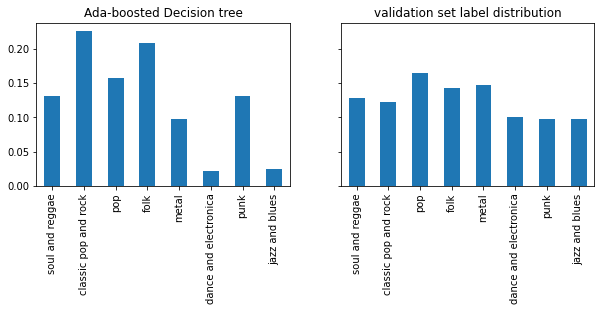

In [223]:
pred = dt_ada_discrete.predict(valid_all)
_, _, pref = evaluate(pred, valid_labels)
print(pref[2])
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="Ada-boosted Decision tree")

## Bagging gaussian naive bayes for tag, metadata and audio features

In [224]:
bagging_gaussian_nb_clf = BaggingClassifier(base_estimator=GaussianNB(),
                            n_estimators=10, 
                            random_state=RANDOM_STATE)

ns_bagging = []
train_bagging_f1s = []
valid_bagging_f1s = []
for i in range(1, 42):
    ns_bagging.append(i)
    bagging_gaussian_nb_clf.set_params(n_estimators=i)
    bagging_gaussian_nb_clf.fit(train_all, train_labels.values.ravel())
    
    pred = bagging_gaussian_nb_clf.predict(valid_all)
    _, _, pref = evaluate(pred, valid_labels.values.ravel())
    valid_bagging_f1s.append(pref[2])
    
    pred = bagging_gaussian_nb_clf.predict(train_all)
    _, _, pref = evaluate(pred, train_labels.values.ravel())
    train_bagging_f1s.append(pref[2])
    
    print(i, train_bagging_f1s[-1], valid_bagging_f1s[-1])

1 0.5346905352709586 0.5821090390774105
2 0.5154154353214624 0.5882505150072335
3 0.5022244605775732 0.5684615448429898
4 0.5001783590013352 0.5638423225714794
5 0.5054753617164013 0.5726880426988377
6 0.5077554761162298 0.574324700588599
7 0.5080052463155686 0.5652736573908979
8 0.51279015695573 0.5666779828094749
9 0.5090166253238316 0.5667243206395545
10 0.5044556524952342 0.5687291384607489
11 0.5054723561596435 0.5722171346033977
12 0.5050005110788315 0.5756102059208025
13 0.5031265050699103 0.5811754195510097
14 0.5033948480902904 0.5739736332407619
15 0.5031184428896688 0.5716095235475591
16 0.5038739675719088 0.572181095133041
17 0.5011141616856077 0.5762555425174578
18 0.5051279450564718 0.5739344825858114
19 0.5025035261767451 0.5820240012605249
20 0.5017772070639817 0.5816466183777301
21 0.503345724796467 0.5795674402563715
22 0.504950368915069 0.572181095133041
23 0.5049468124168769 0.5721140302520765
24 0.5072011117994891 0.5725796480036088
25 0.5083428553623699 0.56854695

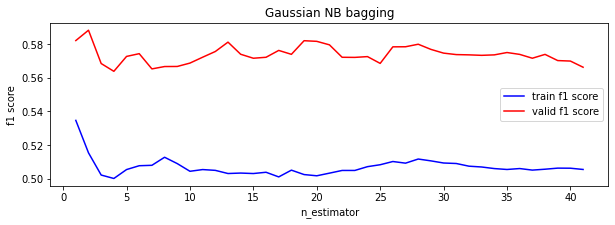

In [225]:
draw_train_valid_score(ns_bagging, train_bagging_f1s, valid_bagging_f1s, 
                       title="Gaussian NB bagging",
                       xlabel="n_estimator",
                       ylabel="f1 score"
                      )

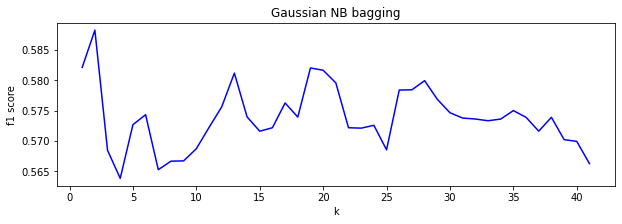

n_estimators maximize f1-score : 2 with 0.5882505150072335


In [226]:
draw_k_line_chart(ns_bagging, valid_bagging_f1s, "f1 score", "Gaussian NB bagging")
bagging_gaussian_nb_best_n_estimators = ns_bagging[np.argmax(valid_bagging_f1s)]
print("n_estimators maximize f1-score :", bagging_gaussian_nb_best_n_estimators, 
      "with", valid_bagging_f1s[np.argmax(valid_bagging_f1s)])

## bagging ada-boosted gaussian nb, tag+meta+audio (0.60156)

### bagging

In [227]:
bagging_ada_gaussian_nb_clf = BaggingClassifier(base_estimator=AdaBoostClassifier(
                                                            GaussianNB(),
                                                            n_estimators=3,
                                                            learning_rate=1,
                                                            algorithm="SAMME",
                                                            random_state=RANDOM_STATE),
                            n_estimators=10, 
                            random_state=RANDOM_STATE)

ns_ada_bagging = []
train_ada_bagging_f1s = []
valid_ada_bagging_f1s = []
for i in range(1, 31):
    ns_ada_bagging.append(i)
    bagging_ada_gaussian_nb_clf.set_params(n_estimators=i)
    bagging_ada_gaussian_nb_clf.fit(train_all, train_labels.values.ravel())
    
    pred = bagging_ada_gaussian_nb_clf.predict(valid_all)
    _, _, pref = evaluate(pred, valid_labels.values.ravel())
    valid_ada_bagging_f1s.append(pref[2])
    
    pred = bagging_ada_gaussian_nb_clf.predict(train_all)
    _, _, pref = evaluate(pred, train_labels.values.ravel())
    train_ada_bagging_f1s.append(pref[2])
    
    print(i, train_ada_bagging_f1s[-1], valid_ada_bagging_f1s[-1])

1 0.5818560433244171 0.6041425645799356
2 0.5994995214015645 0.625452544888627
3 0.6142574166672963 0.6383931148291946
4 0.6073119450807394 0.6339816184948612
5 0.6132895115831336 0.6225068826076543
6 0.6167151505226752 0.6317827814215587
7 0.62435318669525 0.6350290721197506
8 0.631787258919192 0.639101014911601
9 0.6269992133295346 0.6351236567006371
10 0.6209026633631434 0.628958540903348
11 0.6227943069917444 0.6276719322218806
12 0.623789779715791 0.627083975258848
13 0.6241754221409126 0.6286947186113271
14 0.62230587473393 0.6220911534237972
15 0.6195029788736918 0.6234117942236517
16 0.6197014659147531 0.6211780232009844
17 0.6243227889234222 0.6254004371426858
18 0.6263678608706245 0.6205672492928299
19 0.6243454463250471 0.6171197558812238
20 0.6231483542793699 0.6126534209990973
21 0.62524271473341 0.6120513806410531
22 0.6251972578830512 0.6080359435901499
23 0.6250811623313319 0.6090015227231884
24 0.6239458838211385 0.6129647228073065
25 0.6253572020379914 0.6086007498392

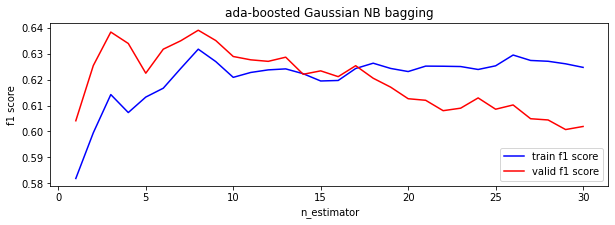

In [228]:
draw_train_valid_score(ns_ada_bagging, train_ada_bagging_f1s, valid_ada_bagging_f1s, 
                       title="ada-boosted Gaussian NB bagging",
                       xlabel="n_estimator",
                       ylabel="f1 score"
                      )

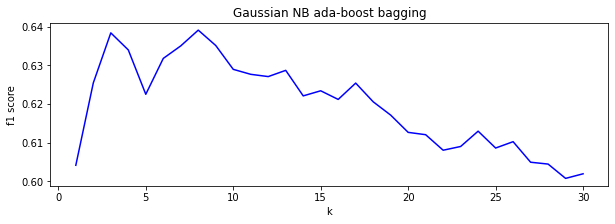

n_estimators maximize f1-score : 8 with 0.639101014911601


In [229]:
draw_k_line_chart(ns_ada_bagging, valid_ada_bagging_f1s, "f1 score", "Gaussian NB ada-boost bagging")
bagging_ada_gaussian_nb_best_n_estimators = ns_ada_bagging[np.argmax(valid_ada_bagging_f1s)]
print("n_estimators maximize f1-score :", bagging_ada_gaussian_nb_best_n_estimators, 
      "with", valid_ada_bagging_f1s[np.argmax(valid_ada_bagging_f1s)])

In [230]:
bagging_ada_gaussian_nb_clf.set_params(n_estimators=19)
models = [bagging_ada_gaussian_nb_clf]
test_preds = predict(models, test_all)
test_preds[0].reset_index(level=0).to_csv(path_or_buf="test_pred.csv", columns=["trackID", "genre"], index=False)

### train valid

In [231]:
bagging_ada_gaussian_nb_clf.set_params(n_estimators=bagging_ada_gaussian_nb_best_n_estimators)
bagging_ada_gaussian_nb_clf.fit(train_all, train_labels.values.ravel())

BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME',
                                                    base_estimator=GaussianNB(),
                                                    learning_rate=1,
                                                    n_estimators=3,
                                                    random_state=854035),
                  n_estimators=8, random_state=854035)

0.639101014911601
                       precision    recall  f1-score   support

      soul and reggae       0.35      0.35      0.35        55
 classic pop and rock       0.56      0.33      0.42        45
                metal       0.77      0.42      0.55        64
                 folk       0.38      0.66      0.48        44
                  pop       0.88      0.88      0.88        66
dance and electronica       0.91      1.00      0.95        74
       jazz and blues       0.91      0.68      0.78        44
                 punk       0.62      0.83      0.71        58

             accuracy                           0.67       450
            macro avg       0.67      0.64      0.64       450
         weighted avg       0.69      0.67      0.66       450



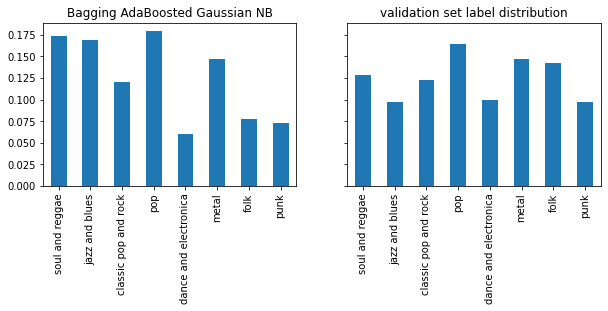

In [271]:
pred = bagging_ada_gaussian_nb_clf.predict(valid_all)
_, _, pref = evaluate(pred, valid_labels)
print(pref[2])
print(classification_report(valid_labels, pred, target_names=valid_labels["genre"].unique()))
draw_train_valid_label_distribution(pd.DataFrame(pred, columns=valid_labels.columns, index=valid_all.index), 
                                    valid_labels,
                                    title1="Bagging AdaBoosted Gaussian NB")

# Get test predicition

In [ ]:
models =  # fill what want to get
test = select_df1_columns_based_on_df2(test_features, train_audio_normalized_low_corr_chi_selected)
test= transform_continuous_0_1(test)
test_preds = predict(models, test)
test_preds[0].reset_index(level=0).to_csv(path_or_buf="test_pred.csv", columns=["trackID", "genre"], index=False)

# End